# Dutch Household Waste

Among many environmental issues that the world is facing these days, "waste" is one of them. In this study I am going to explore and analyze data about Dutch household waste in the period 2001-2020.

### Data sources

Most data that I will use was published by the Dutch [CBS](https://en.wikipedia.org/wiki/Statistics_Netherlands) (Centraal Bureau voor de Statistiek, or "Central Agency for Statistics"), a Dutch governmental institution that gathers statistical information about the Netherlands. Which is published on their website, [in Dutch](https://www.cbs.nl/) and [in English](https://www.cbs.nl/en-gb). 

A bit of supplementary data was taken from [Afvalmonitor](https://afvalmonitor.databank.nl/), or "Waste Monitor", another website regarding Dutch household waste.

### Study topics and hypotheses

In the [CBS section with data about household waste](https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=83452NED&_theme=305), from which I will be downloading a lot of data, one can already see many numbers in a (configurable) [tabular format](https://opendata.cbs.nl/statline/#/CBS/nl/dataset/83452NED/table?ts=1664967262059), and with some effort even in graphical format. I obviously do not have the intention to replicate that (although for some key statistics I may). Rather, I want to explore things that you cannot see there:
* trends over time around household waste
* relationships with other data, e.g. demographic data of Dutch municipalities

Some things that I am wondering and will be exploring:
* At one hand, with rising prosperity, the amount of waste may have grown. At the other hand, with the increased environmental awareness, the amount of waste may have gone down. Which of those is the case?
* There is a lot attention for separating waste these days. Is at least the amount of non-recycleble household waste going down?
* Are there big differences between municipalities, and are there correlations with demographic information (e.g. urban vs rural, household income)?
* These days, there are municipalities where for a household, the waste collection costs depends on the amount of waste. Can we see an impact?

I do not know entirely what to expect, but if I have to formulate things as a hypothesis, then I expect (or maybe I should say: hope) to see:
* that total household waste is at least not going up
* that non-recycable household waste is decreasing
* that a pricing system that depends on the amount of waste has a positive impact

### Structure of this notebook

This study notebook contains four main sections (after this introduction)
1. **Data usability check.** Import of the data, some initial exploration and cleaning, concluding that the data is suitable for the purpose.
2. **Data cleaning.** Further exploration and cleaning of the data, to prepare for the actual data analysis.
3. **Data analysis.** Creation of tables, and especially graphs, related to the study topics, including observations and conclusions.
4. **Summary and conclusions.** A brief summary of the Data analysis section, and suggested next steps.

For those who are only interested in the results, you can basically go to section 3 straightaway, and within that section focus on the graphs and the text below them in particular.

The first two sections are relevant for those who want to have a deeper understanding of the data, and/or want to validate my work.

All sections contain multiple (numbered) sub-sections for further structuring.

### About language and knowledge of the Netherlands

The original data is in Dutch (which is my native language), and so is most of the websites from which the data was collected. To make this study readable for a non-Dutch speaking audience, parts of the data have been translated to English.

For some sections of the study, comparisons are made between different Dutch municipalities. This may be easier to follow for an audience that knows the Netherlands. Some explanations, e.g. characteristics of selected municipalities, have been included though.


### Technical preparations

Multiple Python libraries will be used during this study. Let's import them here.

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import matplotlib library and enable inline plotting 
import matplotlib.pyplot as plt
%matplotlib inline

# Import seaborn
import seaborn as sns

# Import googletrans Translator
from googletrans import Translator

*Note that to reproduce this notebook, these packages must all be installed in your environment. In particular the last one (used for data translation) may be less common. I also did not have it installed. To install it, I first ran (in an Anaconda prompt):*

conda install -c conda-forge googletrans

*However, when using it to translate, it resulted 
in error message:* "AttributeError: 'NoneType' object has no attribute 'group' in googletrans". *Then, after searching online, I upgraded the package via:*

pip install googletrans==4.0.0rc1

*After which it worked.*

# 1. Data usability check

In this section we will import all of the data, and do some initial exploration, and initial cleaning and combining of the data. Goal is to assess whether the quality of the data seems good enough to continue in the first place.

(Some steps, like removing trailing spaces and data translation, are also included here. Not strictly required to assess the usability of the data. However, since this was the most logical place to insert them, they have been added in this section later on still.)

## 1.1 Waste 

Let's start with reading in the main data: the data about household waste. This data was taken from  [this page on the CBS website](https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=83452NED&_theme=305). After configuring on the website the data that I wanted to have, the result was downloaded in .csv format.

In [2]:
# Import waste data
waste = pd.read_csv('83452NED_AfvalPerGemeente.csv', sep = ';')

In [3]:
# Show basic information
waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415880 entries, 0 to 415879
Data columns (total 5 columns):
ID                                 415880 non-null int64
Afvalsoort                         415880 non-null object
RegioS                             415880 non-null object
Perioden                           415880 non-null object
HoeveelheidHuishoudelijkAfval_1    181826 non-null object
dtypes: int64(1), object(4)
memory usage: 15.9+ MB


In [4]:
# Show a small sample
waste.head(5)

,ID,Afvalsoort,RegioS,Perioden,HoeveelheidHuishoudelijkAfval_1
0,0,A025448,GM1680,2001JJ00,724.4
1,1,A025448,GM1680,2002JJ00,.
2,2,A025448,GM1680,2003JJ00,.
3,3,A025448,GM1680,2004JJ00,.
4,4,A025448,GM1680,2005JJ00,782.5


Let's standardize the column names, and also make them understandable for an audience that does not understand Dutch.

In [5]:
# Create a dictionary with old and new columns names
waste_columns_rename = ( {'Afvalsoort': 'waste_type',
                          'RegioS': 'municipality',
                          'Perioden': 'period',
                          'HoeveelheidHuishoudelijkAfval_1' : 'waste_per_person'} )

# Rename columns accordingly
waste.rename(columns = waste_columns_rename, inplace = True)

In [6]:
# Show a sample after renaming
waste.head(10)

,ID,waste_type,municipality,period,waste_per_person
0,0,A025448,GM1680,2001JJ00,724.4
1,1,A025448,GM1680,2002JJ00,.
2,2,A025448,GM1680,2003JJ00,.
3,3,A025448,GM1680,2004JJ00,.
4,4,A025448,GM1680,2005JJ00,782.5
5,5,A025448,GM1680,2006JJ00,.
6,6,A025448,GM1680,2007JJ00,700.4
7,7,A025448,GM1680,2008JJ00,743.7
8,8,A025448,GM1680,2009JJ00,722.9
9,9,A025448,GM1680,2010JJ00,682.2


Observations and explanation:
* we have more than 400,000 rows
* each row represents "amount of waste_per_person (in kilogram) for a particular municipality for a particular year for a particular type of waste
* municipalities and waste type are coded; we need to find explanations for those
* there are quite some missing values for waste_per_person (which is in kilogram, by the way)

For the last one, next to 'missing data', there is another possible explanation. Municipalities come and go in the Netherlands, in a sense that they are being merged and reordered frequently. We will explore that later.

## 1.2 Municipalities

On the CBS website, I also found a [table](https://opendata.cbs.nl/#/CBS/nl/dataset/70739ned/table) that contains municipality codes with municipality names. And also the start- and end dates of the existence of each municipality.

In [7]:
# Import municipality data
municipalities = pd.read_csv('CBS_Gebieden__overzicht_vanaf_1830.csv', sep = ';')

In [8]:
# Show a sample
municipalities.head(5)

,Regio's,Begindatum (datum),Einddatum (datum),Gebieds- of gemeentecode (code),Provincie (naam),Begindatum (sorteerveld) (datum),Einddatum (sorteerveld) (datum)
0,Aa en Hunze,01 jan 1998,,GM1680,Drenthe,19980101,
1,Aagtekerke,01 jan 1830,01 jul 1966,GM1000,Zeeland,18300101,19660701
2,Aalburg,01 jan 1973,01 jan 2019,GM0738,Noord-Brabant,19730101,20190101
3,Aalsmeer,01 jan 1830,,GM0358,Noord-Holland,18300101,
4,Aalst,01 jan 1830,01 jan 1923,GM1001,Noord-Brabant,18300101,19230101


In [9]:
# Show basic information
municipalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 7 columns):
Regio's                             1474 non-null object
Begindatum (datum)                  1474 non-null object
Einddatum (datum)                   1474 non-null object
Gebieds- of gemeentecode (code)     1474 non-null object
Provincie (naam)                    1474 non-null object
Begindatum (sorteerveld) (datum)    1474 non-null int64
Einddatum (sorteerveld) (datum)     1474 non-null object
dtypes: int64(1), object(6)
memory usage: 80.7+ KB


In [10]:
# Create a dictionary with old and new columns names
municipalities_columns_rename = ( {'Regio\'s': 'municipality_name',
                                   'Begindatum (datum)': 'start_date',
                                   'Einddatum (datum)': 'end_date',
                                   'Gebieds- of gemeentecode (code)': 'municipality',
                                   'Provincie (naam)': 'province',
                                   'Begindatum (sorteerveld) (datum)': 'start_date_2',
                                   'Einddatum (sorteerveld) (datum)': 'end_date_2'} )

# Rename columns accordingly
municipalities.rename(columns = municipalities_columns_rename, inplace = True)

While it is not visible in the sample, when trying to merge this table (later in this notebook) with another one using 'municipality' as merging key, it turned out that the municipality code contains trailing spaces. The following piece of code shows an example, followed by code to remove the trailing spaces.

In [11]:
# Show a sample of municipality code with trailing spaces
municipalities.iloc[1,3]

'GM1000  '

In [12]:
# Remove trailing spaces
municipalities['municipality'] = municipalities['municipality'].str.strip()

In [13]:
# Check the result
municipalities.iloc[1,3]

'GM1000'

In [14]:
# Show a sample after renaming (and removing trailing spaces)
municipalities.head(10)

,municipality_name,start_date,end_date,municipality,province,start_date_2,end_date_2
0,Aa en Hunze,01 jan 1998,,GM1680,Drenthe,19980101,
1,Aagtekerke,01 jan 1830,01 jul 1966,GM1000,Zeeland,18300101,19660701
2,Aalburg,01 jan 1973,01 jan 2019,GM0738,Noord-Brabant,19730101,20190101
3,Aalsmeer,01 jan 1830,,GM0358,Noord-Holland,18300101,
4,Aalst,01 jan 1830,01 jan 1923,GM1001,Noord-Brabant,18300101,19230101
5,Aalten,01 jan 1830,,GM0197,Gelderland,18300101,
6,Ter Aar,01 jan 1830,01 jan 2007,GM0480,Zuid-Holland,18300101,20070101
7,Aardenburg,01 jan 1830,01 jan 1995,GM0648,Zeeland,18300101,19950101
8,Aarlanderveen,01 jan 1830,01 jan 1918,GM1002,Zuid-Holland,18300101,19180101
9,Aarle-Rixtel,01 jan 1830,01 jan 1997,GM0739,Noord-Brabant,18300101,19970101


Observations and explanation:
* We now can understand the municipality codes
* And we have start- and end dates for each municipality, so we can check if that indeed explains the missing data

## 1.3 Waste types

For the waste types, I could not directly find a table for the codings. However, I could find and download a 'metadata' table for the original waste data. That appears to contain this information. (It actually also codes the municipality codes, however we have those already.)

Note that it took some exploration (and trial and error) to figure out exactly what and how to extract from this table. The code below does not show all steps that were part of this effort. 

In [15]:
# Import waste meta data; only rows that actually contain codes
waste_metadata = pd.read_csv('83452NED_metadata.csv', sep = ';', skiprows = 10, nrows = 601)

In [16]:
# Show a sample
waste_metadata.head(50)

,Key,Title,Description
0,A025448,Totaal huishoudelijk afval,NaN
1,A025450,Huishoudelijk restafval,Niet gescheiden ingezameld huishoudelijk afval.
2,A025451,Grof huishoudelijk restafval,Niet gescheiden ingezameld restafval dat te gr...
3,A025452,Verbouwingsrestafval,Niet gescheiden ingezameld bouw- en sloopafval...
4,A025454,GFT-afval,"Groente-, fruit- en tuinafval."
5,A025455,Oud papier en karton,"Oud papier en karton, inclusief datgene wat is..."
6,A025456,Textiel,"Gebruikte kleding en ander textiel, inclusief ..."
7,A025457,Verpakkingsglas,Eenmalig verpakkingsglas zoals flessen en potten.
8,A025458,Kunststof verpakkingen,"Kunststof verpakkingen zoals flacons, folies e..."
9,A025459,Drankenkartons,Zoals melk- en sappakken.\n


We need those rows where the 'Key' starts with an A.
Let's take those and store them in a new table.
And also rename the columns.

In [17]:
# Take those rows where the code starts with an A. Store as a new table.
waste_types = waste_metadata.loc[waste_metadata['Key'].str[0:1]=='A'].copy()

In [18]:
# Create a dictionary with old and new columns names
waste_types_columns_rename = ( {'Key': 'waste_type',
                                'Title': 'waste_name',
                                'Description': 'waste_description'} )

# Rename columns accordingly
waste_types.rename(columns = waste_types_columns_rename, inplace = True)

In [19]:
# Show basic information
waste_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 3 columns):
waste_type           37 non-null object
waste_name           37 non-null object
waste_description    25 non-null object
dtypes: object(3)
memory usage: 1.2+ KB


In [20]:
# Show a sample
waste_types.head(10)

,waste_type,waste_name,waste_description
0,A025448,Totaal huishoudelijk afval,NaN
1,A025450,Huishoudelijk restafval,Niet gescheiden ingezameld huishoudelijk afval.
2,A025451,Grof huishoudelijk restafval,Niet gescheiden ingezameld restafval dat te gr...
3,A025452,Verbouwingsrestafval,Niet gescheiden ingezameld bouw- en sloopafval...
4,A025454,GFT-afval,"Groente-, fruit- en tuinafval."
5,A025455,Oud papier en karton,"Oud papier en karton, inclusief datgene wat is..."
6,A025456,Textiel,"Gebruikte kleding en ander textiel, inclusief ..."
7,A025457,Verpakkingsglas,Eenmalig verpakkingsglas zoals flessen en potten.
8,A025458,Kunststof verpakkingen,"Kunststof verpakkingen zoals flacons, folies e..."
9,A025459,Drankenkartons,Zoals melk- en sappakken.\n


Observations and explanation:
* We now can understand the waste_type codes. That is, if you understand Dutch ;-)
* There is a short description and a longer one. The short one seems sufficient.
* We see something very important: the first row reads 'Totaal huishoudelijk afval', or 'Total household waste'. So the waste data that we have may actually contain 'total' rows that are the sum of other rows. We should be careful not to double-count when analyzing the data.

Let's immediately translate the waste name (while keeping the original as well), to make this understandable for a non-Dutch speaking audience.

In [21]:
# First add a column to keep the Dutch
waste_types['waste_name_nl'] = waste_types['waste_name']

# Then translaste the waste_name column
translator = Translator()  
waste_types['waste_name'] = waste_types['waste_name_nl'].apply(lambda x: translator.translate(x, src = 'nl', dest='en').text)

# For consistency, also rename the waste_desciption column
waste_types = waste_types.rename(columns = {'waste_description':'waste_description_nl'})

# And rearrange the columns
waste_types = waste_types[['waste_type', 'waste_name', 'waste_name_nl', 'waste_description_nl']]

In [22]:
# Show the result after translating the waste_name
waste_types

,waste_type,waste_name,waste_name_nl,waste_description_nl
0,A025448,Total household waste,Totaal huishoudelijk afval,NaN
1,A025450,Household residual waste,Huishoudelijk restafval,Niet gescheiden ingezameld huishoudelijk afval.
2,A025451,Coarse household residual waste,Grof huishoudelijk restafval,Niet gescheiden ingezameld restafval dat te gr...
3,A025452,Renovation,Verbouwingsrestafval,Niet gescheiden ingezameld bouw- en sloopafval...
4,A025454,GFT waste,GFT-afval,"Groente-, fruit- en tuinafval."
5,A025455,Old paper and cardboard,Oud papier en karton,"Oud papier en karton, inclusief datgene wat is..."
6,A025456,Textile,Textiel,"Gebruikte kleding en ander textiel, inclusief ..."
7,A025457,Packaging glass,Verpakkingsglas,Eenmalig verpakkingsglas zoals flessen en potten.
8,A025458,Plastic packaging,Kunststof verpakkingen,"Kunststof verpakkingen zoals flacons, folies e..."
9,A025459,Beverage cartons,Drankenkartons,Zoals melk- en sappakken.\n


Overall that looks good, however one value we will update manually. "GFT" is a common Dutch abbreviation for "vegetables, fruit, garden". A decent translation for "GFT afval" would be "Organic waste"

In [23]:
# Update translation for GFT-afval
waste_types.loc[waste_types['waste_type']=='A025454', 'waste_name'] = 'Organic waste'

# Check the result
waste_types[waste_types['waste_type']=='A025454']

,waste_type,waste_name,waste_name_nl,waste_description_nl
4,A025454,Organic waste,GFT-afval,"Groente-, fruit- en tuinafval."


## 1.4 Merge waste with code tables

Let's now enrich the original waste table with waste name and the municipality name. And let's check whether after that indeed for all rows in our Waste table we have not only codes but also readable information.

In [24]:
# Add waste name (by doing an inner join with the table that contains codes and names)
waste = waste.merge(waste_types[['waste_type','waste_name']], how='left') 

# Add municipality name (by doing an inner join with the table that contains codes and names)
waste = waste.merge(municipalities[['municipality','municipality_name']], how='left')

In [25]:
# Show the result (consistent random sample)
waste.sample(20, random_state = 1)

,ID,waste_type,municipality,period,waste_per_person,waste_name,municipality_name
251346,251346,A025473,GM0163,2007JJ00,51.4,Clean rubble,Hellendoorn
255271,255271,A025473,GM0957,2012JJ00,49.5,Clean rubble,Roermond
315679,315679,A025479,GM0491,2020JJ00,NaN,Cast,Bergambacht
223650,223650,A025470,GM0291,2011JJ00,NaN,Hard plastics,Warnsveld
182224,182224,A025467,GM0316,2005JJ00,.,Coarse garden waste,Driebergen-Rijsenburg
313242,313242,A025478,GM0718,2003JJ00,NaN,Bitumen -containing roofing,Vlissingen
229692,229692,A025471,GM1659,2013JJ00,2.1,Carpeting,Laarbeek
129867,129867,A025461,GM1709,2008JJ00,NaN,PMD fraction,Moerdijk
275252,275252,A025475,GM0262,2013JJ00,1.1,Wood waste (C-wood),Lochem
57434,57434,A025455,GM0063,2015JJ00,53.3,Old paper and cardboard,het Bildt


In [26]:
# Show current table information
waste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415880 entries, 0 to 415879
Data columns (total 7 columns):
ID                   415880 non-null int64
waste_type           415880 non-null object
municipality         415880 non-null object
period               415880 non-null object
waste_per_person     181826 non-null object
waste_name           415880 non-null object
municipality_name    415880 non-null object
dtypes: int64(1), object(6)
memory usage: 25.4+ MB


Observations and explanation:
* No 'null' values for waste_name and municipality_name. So all the codes in the waste table were indeed covered by the tables containing the code-name combinations.

## 1.5 Municipality general data

So far, this is looking good!

We'll now also import general (demographic) municipality data, for our goal to look for correlations with waste data. And check will what extent we have indeed data that we can combine.

The general muncipality data was taken from [this page](https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=70072ned&_theme=235) on the CBS website. Similar to the waste data, I configured on the website the data that I wanted to have (a small selection from a wealth of data, actually), then downloaded the result in .csv format.

In [27]:
# Import data per municipality
municipality_data = pd.read_csv('Regionale_kerncijfers_selectie.csv', sep = ';')

In [28]:
# Show basic information
municipality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14520 entries, 0 to 14519
Data columns (total 7 columns):
ID                                          14520 non-null int64
RegioS                                      14520 non-null object
Perioden                                    14520 non-null object
TotaleBevolking_1                           8560 non-null float64
Bevolkingsdichtheid_57                      8560 non-null float64
GemiddeldeHuishoudensgrootte_89             8560 non-null float64
ParticuliereHuishoudensExclStudenten_122    3905 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 794.2+ KB


In [29]:
# Show a sample
municipality_data.sample(20, random_state = 1)

,ID,RegioS,Perioden,TotaleBevolking_1,Bevolkingsdichtheid_57,GemiddeldeHuishoudensgrootte_89,ParticuliereHuishoudensExclStudenten_122
3933,7103,GM0781,2014JJ00,NaN,NaN,NaN,NaN
3099,5933,GM0303,2020JJ00,41555.0,125.0,2.32,48.6
2674,5340,GM0384,2015JJ00,26666.0,2224.0,1.95,39.5
1312,3434,GM0492,2013JJ00,NaN,NaN,NaN,NaN
2364,4910,GM0314,2005JJ00,NaN,NaN,NaN,NaN
11643,17901,GM0617,2004JJ00,9312.0,182.0,2.48,NaN
4258,7556,GM1942,2019JJ00,57715.0,1388.0,2.21,65.6
6370,10516,GM0258,2011JJ00,NaN,NaN,NaN,NaN
3844,6982,GM0653,2005JJ00,10208.0,107.0,2.48,NaN
1505,3707,GM0063,2006JJ00,11013.0,119.0,2.39,NaN


In [30]:
# Create a dictionary with old and new columns names
municipality_data_columns_rename = ( {'RegioS': 'municipality',
                                   'Perioden': 'period',
                                   'TotaleBevolking_1': 'population',
                                   'Bevolkingsdichtheid_57': 'population_density',
                                   'GemiddeldeHuishoudensgrootte_89': 'avg_household_size',
                                   'ParticuliereHuishoudensExclStudenten_122': 'avg_household_income'} )
# Rename columns accordingly
municipality_data.rename(columns = municipality_data_columns_rename, inplace = True)

In [31]:
# Show a sample with new columns names
municipality_data.sample(20, random_state = 1)

,ID,municipality,period,population,population_density,avg_household_size,avg_household_income
3933,7103,GM0781,2014JJ00,NaN,NaN,NaN,NaN
3099,5933,GM0303,2020JJ00,41555.0,125.0,2.32,48.6
2674,5340,GM0384,2015JJ00,26666.0,2224.0,1.95,39.5
1312,3434,GM0492,2013JJ00,NaN,NaN,NaN,NaN
2364,4910,GM0314,2005JJ00,NaN,NaN,NaN,NaN
11643,17901,GM0617,2004JJ00,9312.0,182.0,2.48,NaN
4258,7556,GM1942,2019JJ00,57715.0,1388.0,2.21,65.6
6370,10516,GM0258,2011JJ00,NaN,NaN,NaN,NaN
3844,6982,GM0653,2005JJ00,10208.0,107.0,2.48,NaN
1505,3707,GM0063,2006JJ00,11013.0,119.0,2.39,NaN


So now we have:

- waste date per municipality, over the years
- general data per municipality, over the years

Let's first do a quick check though till what extent we have it for a similar set of municipalities. In particular, whether for those municipalities for which we have waste data, we also have general data. (The other way around is less relevant for this study).

We could check 'per municipality per year' as well, but to keep it simple let's not do that.

In [32]:
# Get the municipalities for which we have waste data
municipalities_havewastedata = waste['municipality'].unique()

# Get the municipalities for which we have general data
municipalities_havegeneraldata = municipality_data['municipality'].unique()

In [33]:
# Get and print some statisitics
print('Number of municipalities for which we have waste data:', len(municipalities_havewastedata))
print('Number of municipalities for which we have general data:', len(municipalities_havegeneraldata))

intersection = np.intersect1d(municipalities_havewastedata, municipalities_havegeneraldata)
print('Number of municipalities that are in both collections:', len(intersection))
      

Number of municipalities for which we have waste data: 562
Number of municipalities for which we have general data: 726
Number of municipalities that are in both collections: 562


So that means that all municipalities for which we have waste data we also have general data. (As mentioned, we ignored the years at this point.)

Also as mentioned it is less relevant when we have general data but no waste data. Let's however still look what this is to increase our overall understanding of the data.

In [34]:
# Get the municipalities for which we only have general data and no waste data
municipalities_onlygeneraldata = np.setdiff1d(municipalities_havegeneraldata, municipalities_havewastedata)

# Show a sample of those
municipalities[municipalities['municipality'].isin(municipalities_onlygeneraldata)].sample(20, random_state = 1)

,municipality_name,start_date,end_date,municipality,province,start_date_2,end_date_2
352,Fijnaart en Heijningen,01 jan 1830,01 jan 1997,GM0778,Noord-Brabant,18300101,19970101
371,Gemert,01 jan 1830,01 jan 1997,GM0782,Noord-Brabant,18300101,19970101
1467,Zwartsluis,01 jan 1830,01 jan 2001,GM0192,Overijssel,18300101,20010101
504,Helvoirt,01 jan 1830,01 jan 1996,GM0795,Noord-Brabant,18300101,19960101
1405,Wouw,01 jan 1830,01 jan 1997,GM0875,Noord-Brabant,18300101,19970101
123,Bergeyk,01 jan 1830,25 sep 1998,GM0749,Noord-Brabant,18300101,19980925
585,IJsselmuiden,01 jan 1830,01 jan 2001,GM0191,Overijssel,18300101,20010101
298,Den Dungen,01 jan 1830,01 jan 1996,GM0768,Noord-Brabant,18300101,19960101
825,Nieuw-Ginneken,01 jan 1942,01 jan 1997,GM0817,Noord-Brabant,19420101,19970101
154,Bladel en Netersel,01 jan 1830,01 jan 1997,GM0754,Noord-Brabant,18300101,19970101


Observations and explanation:
* For all municipalities for which we have waste data, we also have general data
* For those municipalities for which we have general data but no general data, a sample showed that all of those municipalities ceased to exist before the the first year for which we have waste data.

So that looks good. 

## 1.6 Municipality waste collection pricing system

"Diftar" is a (Dutch) term used for "differentiated tariffs" for household waste collection. For the goal of analyzing an impact of the pricing system, I found data [here](https://afvalmonitor.databank.nl//Jive/Jive?cat_open=Gemeentelijk%20niveau).

After some configuration, I could download data per municipality for the year 2018 and download it as a .txt file

In [35]:
# Import diftar system (and set column names)
diftar2018 = pd.read_csv('Diftarsysteem per gemeente - 2018.txt', skiprows=1, sep = '\t', names = ['municipality_name', 'pricing_system'])

In [36]:
# Show a sample
diftar2018.head(5)

,municipality_name,pricing_system
0,Aa en Hunze,Aantal personen
1,Aalsmeer,Volume
2,Aalten,Dure afvalzak
3,Achtkarspelen,Aantal personen
4,Alblasserdam,Aantal personen


In [37]:
# Check what entries we have
diftar2018['pricing_system'].value_counts()

Aantal personen                         166
Volume & frequentie                      77
Dure afvalzak                            23
Vast tarief                              21
Volume, frequentie & aantal personen     20
Volume                                   15
Dure afvalzak & aantal personen          10
Gewicht & frequentie                      7
Gewicht                                   5
Verschillende systemen in gemeente        4
Afvalstoffenheffing Nederland             1
Diftarsysteem per gemeente                1
Gewicht & aantal personen                 1
Name: pricing_system, dtype: int64

Observations and explanation:
* For several hundreds of muncipalities we have information (for 2018) about the pricing system
* There are many different pricing systems, but it will be possible to group them into systems that are and are not dependent on the amount of waste.
* Although we didn't try it out, it should be possible to combine the data based on the municipality name.

Let's translate the data now as well.

In [38]:
# First rename the current column (in which we will keep the Dutch)
diftar2018 = diftar2018.rename(columns = {'pricing_system' : 'pricing_system_nl'})

# To avoid translating the same term many times, first extract the unique terms, then translate those, then merge back
# Extract unique terms
diftar2018_terms = pd.DataFrame(diftar2018['pricing_system_nl'].unique(),columns=['pricing_system_nl'])
# Translate terms
translator = Translator()  
diftar2018_terms['pricing_system'] = diftar2018_terms['pricing_system_nl'].apply(lambda x: translator.translate(x, src = 'nl', dest='en').text)
# Merge back
diftar2018 = diftar2018.merge(diftar2018_terms, how = 'left') 

In [39]:
# Show the result of the translation
diftar2018['pricing_system'].value_counts()

Number of persons                         166
Volume and frequency                       77
Expensive waste bag                        23
Fixed rate                                 21
Volume, frequency and number of people     20
Volume                                     15
Expensive waste bag & number of people     10
Weight & Frequency                          7
Nan                                         6
Weight                                      5
Various systems in the municipality         4
Weight and number of people                 1
Waste tax Netherlands                       1
Diftar system per municipality              1
Name: pricing_system, dtype: int64

## 1.7 Conclusion about the usability of the data

Conclusion of the assessment is that it looks like we have usable data!
We now have dataframes:
* 'waste'
* 'municipality_data'
* 'diftar2018'

All with a sufficient amount of data, and having keys on which we can combine them.

Conclusion of the assessment is that it looks like we have a set of usable data!


# 2. Data cleaning

Before we can really go analyze the data, we need to do further data cleaning and formatting. That is what we will do in this section.

## 2.1 Waste: periods

The column 'period' contains values that we want to reformat.

In [40]:
# Get current the values for period
waste['period'].unique()

array(['2001JJ00', '2002JJ00', '2003JJ00', '2004JJ00', '2005JJ00',
       '2006JJ00', '2007JJ00', '2008JJ00', '2009JJ00', '2010JJ00',
       '2011JJ00', '2012JJ00', '2013JJ00', '2014JJ00', '2015JJ00',
       '2016JJ00', '2017JJ00', '2018JJ00', '2019JJ00', '2020JJ00'],
      dtype=object)

Let's make this an integer, representing the year.

In [41]:
# Convert by just taking the first for characters
waste['period'] = waste['period'].str[:4]

# Convert to an integer
waste = waste.astype({'period':int}, errors = 'raise')

In [42]:
# Check the result
waste['period'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

## 2.2 Waste: waste per person, validity of entries

What we could see in the samples (and I also saw already in a data-previewer on the CBS website) is that the important column waste_per_person contains not only valid numbers like '42.3', but also NaN, '0.0' and what appears to be just dots('.').

Let's analyze this and clean it where necessary. After that we can then convert this to a 'float' (so we can do calculations with it).

Taking a look at all different values of waste_per_person is not going to work. Let's take a look at a smaller sample (being "Aa en Hunze" in 2010).

In [43]:
# Take subset of the waste 
aaenhunze10 = waste[(waste['municipality']=='GM1680') & (waste['period']==2010)]

# Show the existing values for waste_per_person
aaenhunze10['waste_per_person'].unique()

array(['   682.2', '   252.2', '    16.8', '     1.7', '   207.7',
       '    75.3', '       .', '    22.6', '     5.5', nan, '     1.2',
       '    39.9', '     5.1', '     2.0', '    11.5', '    23.9',
       '     3.9', '     2.6', '     1.3', '     1.1', '     0.4',
       '     0.1'], dtype=object)

What we see is that next to 'null' (nan) values, we also have '      .' (dot) values. 

Let's check on the entire dataframe how many of such 'dot' values we have.
And also check how many 'NaN' and '0.0' values there are, as they are candidates to convert those dots into.

In [44]:
# Create subset where waste_per_person ends in a dot
waste_ends_dot = waste[waste['waste_per_person'].str[-1]=='.']

# Show how many we have
waste_ends_dot['waste_per_person'].value_counts()

       .    18241
Name: waste_per_person, dtype: int64

In [45]:
# Show how many 0.0 value there are
len(waste[waste['waste_per_person'].str[-4:]==' 0.0'])

3494

In [46]:
# Show how many NaN values there are
len(waste[waste['waste_per_person'].isnull()])

234054

The amounts of 'dot' values and '0.0' values are relatively low in comparison to 'NaN'.

I am not not entirely sure whether there is any functional difference between the three of them. It could be that 0.0 means that while the municipality did as such collect this type of waste, the amount was really low. While the other two ('dot' values and NaN) the data is just missing. For those two it is even less clear what could possibly be the different meaning of them.

It seems okay to convert the 'dot' values to NaN.

In [47]:
# Replace the 'dot' values in waste_per_person to 0
waste.loc[waste['waste_per_person'].str[-1]=='.', 'waste_per_person']=0.0

After this step, it should be possible to convert waste_per_person to a float (so we can do arithmetic operations with it).

In [48]:
# Convert waste_per_person to float
waste = waste.astype({'waste_per_person':float}, errors = 'raise')

# Check a sample
waste.head(5)

,ID,waste_type,municipality,period,waste_per_person,waste_name,municipality_name
0,0,A025448,GM1680,2001,724.4,Total household waste,Aa en Hunze
1,1,A025448,GM1680,2002,0.0,Total household waste,Aa en Hunze
2,2,A025448,GM1680,2003,0.0,Total household waste,Aa en Hunze
3,3,A025448,GM1680,2004,0.0,Total household waste,Aa en Hunze
4,4,A025448,GM1680,2005,782.5,Total household waste,Aa en Hunze


In [49]:
# Let's confirm that we can do mathematical operations now with it, by taking the sum of the column

print ('Column total:', waste['waste_per_person'].sum())


Column total: 8799619.000000002


In [50]:
# Also let's have a look at the values for the small sample again (to confirm success)

aaenhunze10 = waste[(waste['municipality']=='GM1680') & (waste['period']==2010)]
aaenhunze10['waste_per_person'].value_counts()

2.0      2
3.9      1
5.1      1
5.5      1
11.5     1
1.3      1
1.1      1
252.2    1
682.2    1
207.7    1
0.1      1
39.9     1
23.9     1
0.4      1
1.7      1
16.8     1
75.3     1
22.6     1
1.2      1
2.6      1
0.0      1
Name: waste_per_person, dtype: int64

All looks good, we seem to have valid entries now (including Nan) for waste_per_person.

## 2.3 Waste: waste per person, getting the correct total value

As we observed earlier, one of the waste types in the waste table actually appears to be a 'total', the sum of the other waste types. So each such row would then represent the total average waste per person, for a municipality for a year. At one hand having this total total value in our data implies a risk of double counting. At the other hand it is an interesting number as such. We need to explore this, to figure out how to use the data.

Then in addition, from the [CBS website](https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=83452NED&_theme=305) we can also learn that *"De enige hoeveelheid die geen betrekking heeft op ingezameld afval, is het eindverwerkt afval."* Translated: "Final processed waste" is not related to collected household waste. So any such rows should be ignored altogether. (Admitted: at first I had missed this and had not excluded it. Once I observed large differences between the 'total value' and 'the sum of everything else' , I found out that this made the difference.... and then I excluded it still here.)  


What we're going to create:
* a dataframe with the total (average waste per person) per municipality per year - by taking the total row
* a dataframe with the total (average waste per person) per municipality per year - by summing up everything else while excluding (1) the total row (2) the final processed waste

Then we'll combine this into one dataframe so we can compare and analyze. And figure out which data to use.

(Spoiler alert: this is going to be lengthly, and the result will be that the latter (summing up everything else) gives us the best data. Skip to the next section if you are happy with that conclusion straightaway.)

In [51]:
# Get the code for waste_type 'total' and for 'final processed waste'
waste_type_total = 'A025448'
waste_type_eindverwerktafval = 'A025488'

# Create two dataframes: one with the 'totals' and one 'everything apart from totals and final processed waste'
waste_only_totals = waste[waste['waste_type']==waste_type_total].copy()
waste_without_totals = waste[(waste['waste_type'] != waste_type_total) & (waste['waste_type'] != waste_type_eindverwerktafval)].copy()

# Get the row counts to be able to check
print ('Rows in source table:', len(waste))
print ('Rows in totals table:', len(waste_only_totals))
print ('Rows in not-totals table:', len(waste_without_totals))
print ('Rows in source table being final processed waste', len(waste[waste['waste_type']==waste_type_eindverwerktafval]))

Rows in source table: 415880
Rows in totals table: 11240
Rows in not-totals table: 393400
Rows in source table being final processed waste 11240


In [52]:
# Check the numbers
print ('Should be zero:', 415880-393400-11240-11240)

Should be zero: 0


In our table that excludes totals (and final processed waste), let's now group by municipality and period. This will give us an alternative total (which supposedly is the same). 

In [53]:
# Waste without totals: group by municipality and period to get a 'calculated' total
waste_without_totals_grouped = waste_without_totals.groupby(['municipality', 'period']).agg({'waste_per_person': 'sum'}).reset_index().copy()

To get an initial impression, let's take a look at the data for one municipality

In [54]:
# Show sample of 'original' totals for one municipality
waste_only_totals[waste_only_totals['municipality'] == 'GM1680']

,ID,waste_type,municipality,period,waste_per_person,waste_name,municipality_name
0,0,A025448,GM1680,2001,724.4,Total household waste,Aa en Hunze
1,1,A025448,GM1680,2002,0.0,Total household waste,Aa en Hunze
2,2,A025448,GM1680,2003,0.0,Total household waste,Aa en Hunze
3,3,A025448,GM1680,2004,0.0,Total household waste,Aa en Hunze
4,4,A025448,GM1680,2005,782.5,Total household waste,Aa en Hunze
5,5,A025448,GM1680,2006,0.0,Total household waste,Aa en Hunze
6,6,A025448,GM1680,2007,700.4,Total household waste,Aa en Hunze
7,7,A025448,GM1680,2008,743.7,Total household waste,Aa en Hunze
8,8,A025448,GM1680,2009,722.9,Total household waste,Aa en Hunze
9,9,A025448,GM1680,2010,682.2,Total household waste,Aa en Hunze


In [55]:
# Show the 'calculated' totals for one municipality
waste_without_totals_grouped[waste_without_totals_grouped['municipality'] == 'GM1680']

,municipality,period,waste_per_person
9700,GM1680,2001,724.6
9701,GM1680,2002,0.0
9702,GM1680,2003,0.0
9703,GM1680,2004,657.4
9704,GM1680,2005,782.3
9705,GM1680,2006,0.0
9706,GM1680,2007,700.4
9707,GM1680,2008,743.6
9708,GM1680,2009,722.8
9709,GM1680,2010,676.8


That looks promising in a sense that the numbers seem to comply. However, we also see that not always both numbers appear to exist. E.g. for 2004 we see '0.0' for the original total and '657.4' for the grouped-total.

Let's, merge these two dataframes and create one dataframe that contains both values for totals.

In [56]:
# Create one dataframe with 'original' and 'calculated' total waste per person (per municipality per year)
waste_totals_per_municipality = waste_only_totals.merge(waste_without_totals_grouped, on = ['municipality', 'period'], how = 'outer', suffixes = ('_total', '_groupedtotal'))

In [57]:
# Show a sample
waste_totals_per_municipality.head(50)

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal
0,0,A025448,GM1680,2001,724.4,Total household waste,Aa en Hunze,724.6
1,1,A025448,GM1680,2002,0.0,Total household waste,Aa en Hunze,0.0
2,2,A025448,GM1680,2003,0.0,Total household waste,Aa en Hunze,0.0
3,3,A025448,GM1680,2004,0.0,Total household waste,Aa en Hunze,657.4
4,4,A025448,GM1680,2005,782.5,Total household waste,Aa en Hunze,782.3
5,5,A025448,GM1680,2006,0.0,Total household waste,Aa en Hunze,0.0
6,6,A025448,GM1680,2007,700.4,Total household waste,Aa en Hunze,700.4
7,7,A025448,GM1680,2008,743.7,Total household waste,Aa en Hunze,743.6
8,8,A025448,GM1680,2009,722.9,Total household waste,Aa en Hunze,722.8
9,9,A025448,GM1680,2010,682.2,Total household waste,Aa en Hunze,676.8


In [58]:
# Calculate the amount of data points
len(waste_totals_per_municipality)

11240

So, what do we have now? We have 11240 'data points' (municipality-year combinations) for which have:
* the original total_waste_per_person (from the imported data), named 'waste_per_person_total'
* the calculated total_waste_per_person (being the total of all different waste types), named 'waste_per_person_groupedtotal'

By looking at a sample, what we observe:
* For those rows where both these totals have a value, those values are not always identical, but quite similar. So that seems to confirm that 'Total household waste' indeed is a total of all individual waste types. We should confirm that though by doing a more thorough check.
* In additon, we see that both totals appear to contain 'NaN' values and '0.0' values in both columns.

Especially given this second observations it is uncertain then which is the better number to use (by the time we are going to really analyze the data, create graphs). Or whether we should even sometimes use one, sometimes the other.

To find it out, let us investigate the different cases:
1. waste_per_person_total is 'NaN'
2. waste_per_person_grouped is 'NaN'
3. waste_per_person_total = 0.0 and waste_per_person_groupedtotal is > 0.0
4. waste_per_person_total > 0.0 and waste_per_person_groupedtotal is = 0.0
5. waste_per_person_total = 0.0 and waste_per_person_groupedtotal is = 0.0
6. waste_per_person_total > 0.0 and waste_per_person_groupedtotal is > 0.0

#### 1. waste_per_person_total is 'NaN'

In [59]:
# Check how many times waste_per_person_total is NaN
len(waste_totals_per_municipality[waste_totals_per_municipality['waste_per_person_total'].isnull()])

2681

In [60]:
# Show a sample 
waste_totals_per_municipality[waste_totals_per_municipality['waste_per_person_total'].isnull()].head(50)

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal
38,38,A025448,GM0738,2019,NaN,Total household waste,Aalburg,0.0
39,39,A025448,GM0738,2020,NaN,Total household waste,Aalburg,0.0
86,86,A025448,GM0480,2007,NaN,Total household waste,Ter Aar,0.0
87,87,A025448,GM0480,2008,NaN,Total household waste,Ter Aar,0.0
88,88,A025448,GM0480,2009,NaN,Total household waste,Ter Aar,0.0
89,89,A025448,GM0480,2010,NaN,Total household waste,Ter Aar,0.0
90,90,A025448,GM0480,2011,NaN,Total household waste,Ter Aar,0.0
91,91,A025448,GM0480,2012,NaN,Total household waste,Ter Aar,0.0
92,92,A025448,GM0480,2013,NaN,Total household waste,Ter Aar,0.0
93,93,A025448,GM0480,2014,NaN,Total household waste,Ter Aar,0.0


It looks like for these cases the groupedtotal is always 0. Even more so, I suspect that these are the cases where the municipality ceased to exist. Let's check for the examples in the example above.

In [61]:
# Show municipality data for examples where the original total = 'NaN'
municipalities[municipalities['municipality_name'].isin(['Aalburg', 'Ter Aar','Akersloot','Alkemade'])]

,municipality_name,start_date,end_date,municipality,province,start_date_2,end_date_2
2,Aalburg,01 jan 1973,01 jan 2019,GM0738,Noord-Brabant,19730101,20190101
6,Ter Aar,01 jan 1830,01 jan 2007,GM0480,Zuid-Holland,18300101,20070101
24,Akersloot,01 jan 1830,01 jan 2002,GM0360,Noord-Holland,18300101,20020101
29,Alkemade,01 jan 1830,01 jan 2009,GM0483,Zuid-Holland,18300101,20090101


That is exactly in line with what I suspected. For each of these examples the NaN rows are for municipality-year combinations that do not exist.
We can conclude that where the 'original' total is NaN, the municipality did not exist.

#### 2. waste_per_person_grouped is 'NaN'

In [62]:
# Check how many times waste_per_person_grouped is NaN
len(waste_totals_per_municipality[waste_totals_per_municipality['waste_per_person_groupedtotal'].isnull()])

0

Observation: No NaN values for grouped totals.

#### 3. waste_per_person_total = 0.0 and waste_per_person_groupedtotal is > 0.0

In [63]:
# Check how many occurrences
len(waste_totals_per_municipality[(waste_totals_per_municipality['waste_per_person_groupedtotal'] > 0.0) & (waste_totals_per_municipality['waste_per_person_total'] == 0.0)])

526

In [64]:
# Show a sample
waste_totals_per_municipality[(waste_totals_per_municipality['waste_per_person_groupedtotal'] > 0.0) & (waste_totals_per_municipality['waste_per_person_total'] == 0.0)].head(20)

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal
3,3,A025448,GM1680,2004,0.0,Total household waste,Aa en Hunze,657.4
43,43,A025448,GM0358,2004,0.0,Total household waste,Aalsmeer,461.7
103,103,A025448,GM0305,2004,0.0,Total household waste,Abcoude,536.6
105,105,A025448,GM0305,2006,0.0,Total household waste,Abcoude,496.7
106,106,A025448,GM0305,2007,0.0,Total household waste,Abcoude,492.1
121,121,A025448,GM0059,2002,0.0,Total household waste,Achtkarspelen,740.7
140,140,A025448,GM0360,2001,0.0,Total household waste,Akersloot,531.0
366,366,A025448,GM0060,2007,0.0,Total household waste,Ameland,916.8
368,368,A025448,GM0060,2009,0.0,Total household waste,Ameland,1089.8
509,509,A025448,GM0366,2010,0.0,Total household waste,Anna Paulowna,620.2


Observation: there are 526 cases where there is no 'original' total in the data, however one could actually be calculated from the individual waste types entries.

#### 4. waste_per_person_total > 0.0 and waste_per_person_groupedtotal is = 0.0

In [65]:
# Check how many occurrences
len(waste_totals_per_municipality[(waste_totals_per_municipality['waste_per_person_groupedtotal'] == 0.0) & (waste_totals_per_municipality['waste_per_person_total'] > 0.0)])

2

In [66]:
# Show them
waste_totals_per_municipality[(waste_totals_per_municipality['waste_per_person_groupedtotal'] == 0.0) & (waste_totals_per_municipality['waste_per_person_total'] > 0.0)]

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal
989,989,A025448,GM0893,2010,658.5,Total household waste,Bergen (L.),0.0
3089,3089,A025448,GM0907,2010,514.8,Total household waste,Gennep,0.0


Observation: there are 2 cases in the data where there is an 'original' total in the data, however none can be calculated; that is, there is no breakdown.

#### 5. waste_per_person_total = 0.0 and waste_per_person_groupedtotal is = 0.0

In [67]:
# Check how many occurrences
len (waste_totals_per_municipality[(waste_totals_per_municipality['waste_per_person_groupedtotal'] == 0.0) & (waste_totals_per_municipality['waste_per_person_total'] == 0.0)])

405

In [68]:
# Show a sample
waste_totals_per_municipality[(waste_totals_per_municipality['waste_per_person_groupedtotal'] == 0.0) & (waste_totals_per_municipality['waste_per_person_total'] == 0.0)].head(50)

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal
1,1,A025448,GM1680,2002,0.0,Total household waste,Aa en Hunze,0.0
2,2,A025448,GM1680,2003,0.0,Total household waste,Aa en Hunze,0.0
5,5,A025448,GM1680,2006,0.0,Total household waste,Aa en Hunze,0.0
13,13,A025448,GM1680,2014,0.0,Total household waste,Aa en Hunze,0.0
29,29,A025448,GM0738,2010,0.0,Total household waste,Aalburg,0.0
63,63,A025448,GM0197,2004,0.0,Total household waste,Aalten,0.0
64,64,A025448,GM0197,2005,0.0,Total household waste,Aalten,0.0
65,65,A025448,GM0197,2006,0.0,Total household waste,Aalten,0.0
167,167,A025448,GM0482,2008,0.0,Total household waste,Alblasserdam,0.0
201,201,A025448,GM0483,2002,0.0,Total household waste,Alkemade,0.0


So there are 405 rows where both are 0.0. This appears to be missing data.


#### 6. waste_per_person_total > 0.0 and waste_per_person_groupedtotal is > 0.0

In [69]:
# Check how many occurrences
len (waste_totals_per_municipality[(waste_totals_per_municipality['waste_per_person_groupedtotal'] > 0.0) & (waste_totals_per_municipality['waste_per_person_total'] > 0.0)])

7626

While some samples showed that the two 'total' values that we have now appear to comply, let us check more thoroughly whether that is the case. By calculating a percentual difference between them, then figure out how big those differences are.

In [70]:
# Create a dataframe with only those rows where both totals are > 0.0
wtpm_hastwototals = waste_totals_per_municipality[(waste_totals_per_municipality['waste_per_person_groupedtotal'] > 0.0) & (waste_totals_per_municipality['waste_per_person_total'] > 0.0)].copy()

# Add a column calculating the difference between the two
wtpm_hastwototals['totals_diff'] = wtpm_hastwototals['waste_per_person_total'] - wtpm_hastwototals['waste_per_person_groupedtotal'] 
wtpm_hastwototals['totals_diff_perc'] = 100*wtpm_hastwototals['totals_diff']/wtpm_hastwototals['waste_per_person_total']


In [71]:
# Show the top 5 'positive' differences ('grouped total' is smaller than the 'original total')
wtpm_hastwototals.sort_values('totals_diff_perc').tail(5)

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal,totals_diff,totals_diff_perc
852,852,A025448,GM0889,2013,363.7,Total household waste,Beesel,342.8,20.9,5.746494
10417,10417,A025448,GM1783,2018,495.4,Total household waste,Westland,466.9,28.5,5.752927
7078,7078,A025448,GM0269,2019,497.8,Total household waste,Oldebroek,468.8,29.0,5.825633
8497,8497,A025448,GM0845,2018,414.6,Total household waste,Sint-Michielsgestel,387.1,27.5,6.632899
6682,6682,A025448,GM0267,2003,412.4,Total household waste,Nijkerk,384.9,27.5,6.668283


In [72]:
# Show the top 5 'negative' differences ('grouped total' is larger than the 'original total')
wtpm_hastwototals.sort_values('totals_diff_perc').head(5)

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal,totals_diff,totals_diff_perc
363,363,A025448,GM0060,2004,929.1,Total household waste,Ameland,975.0,-45.9,-4.940265
243,243,A025448,GM0141,2004,616.9,Total household waste,Almelo,634.7,-17.8,-2.885395
6125,6125,A025448,GM1731,2006,718.8,Total household waste,Midden-Drenthe,729.4,-10.6,-1.474680
9643,9643,A025448,GM0984,2004,462.0,Total household waste,Venray,464.4,-2.4,-0.519481
2452,2452,A025448,GM0225,2013,392.7,Total household waste,Druten,393.1,-0.4,-0.101859


The differences range from - 5% to + 6%. That is within an acceptable range.

Before we summarize and conclude, a quick check whether our breakdown is correct and complete:

In [73]:
# Double check whether this analysis was correct
print ('Total rows:', len(waste_totals_per_municipality))
print ('Total of breakdown (should be same):', 2681+0+526+2+405+7626)

Total rows: 11240
Total of breakdown (should be same): 11240


Let's summarize what we learned.

So in dataframe *waste_totals_per_municipality* we have 11240 'data points' (municipality-year combinations) for which have:
* the original total_waste_per_person (from the imported data), named 'waste_per_person_total'
* the calculated total_waste_per_person (being the total of all different waste types), named 'waste_per_person_groupedtotal'

Where:
* for 2681 points, the muncipality did not exist in that year; we can ignore (throw away) these rows
* for 526 points, the original data did not contain a total; however we can calculate one by summing up the waste-per-type 
* for 2 points, the original data did contain a total but not a breakdown per waste-type; they are for small municipalities for the year 2010; we'll keep it in mind and may still take action if we see anything suspect for 2010, but will ignore this for now
* for 405 rows, there is neither a total, nor any breakdown; this is missing data
* for 7626 rows, there is both an original total and a calculate total; for the vast majority the values comply in a sense that their difference is small (up to 6% difference)

Of which we conclude for data analysis:

* when we are going to look into 'total amounts of waste', we can better use the calculated 'grouped total' (sum of the breakdown per waste type), rather than the total that was given in the original data
* that there is missing data: no data for particular municipality-year combinations, even though the municipality did exist in that year

## 2.4 Municipality data: periods, type conversions

Also for this table, let's replace the period by a proper year, and do the necessary data cleaning and type conversions.

In [74]:
# Show a small sample again
municipality_data.head(5)

,ID,municipality,period,population,population_density,avg_household_size,avg_household_income
0,1602,GM1680,2001JJ00,25208.0,91.0,2.43,NaN
1,1603,GM1680,2002JJ00,25552.0,92.0,2.43,NaN
2,1604,GM1680,2003JJ00,25305.0,91.0,2.41,NaN
3,1605,GM1680,2004JJ00,25218.0,91.0,2.40,NaN
4,1606,GM1680,2005JJ00,25329.0,91.0,2.40,NaN


In [75]:
# Show types, and amount of (missing) data
municipality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14520 entries, 0 to 14519
Data columns (total 7 columns):
ID                      14520 non-null int64
municipality            14520 non-null object
period                  14520 non-null object
population              8560 non-null float64
population_density      8560 non-null float64
avg_household_size      8560 non-null float64
avg_household_income    3905 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 794.2+ KB


In [76]:
# Convert 'period' by just taking the first for characters
municipality_data['period'] = municipality_data['period'].str[:4]

# Convert to an integer
municipality_data = municipality_data.astype({'period':int}, errors = 'raise')

In [77]:
# Clean up bad values of average household income
# (The code to detect these has been removed for readability.)
municipality_data.loc[municipality_data['avg_household_income']== '       .', 'avg_household_income']= np.nan


In [78]:
# Convert to a float
municipality_data = municipality_data.astype({'avg_household_income':float}, errors = 'raise')

Unfortunately, we don't have the municipality name in this table. Let's add it though, by extracting it from another table and adding it here.

In [79]:
# Get all municipality codes and names
mun_codes_and_names = waste[['municipality','municipality_name']].drop_duplicates()

# Add to municipality_data
municipality_data = municipality_data.merge(mun_codes_and_names, how = 'left')

In [80]:
# Show a sample after these steps (to confirm this was successful)
municipality_data.head(10)

,ID,municipality,period,population,population_density,avg_household_size,avg_household_income,municipality_name
0,1602,GM1680,2001,25208.0,91.0,2.43,NaN,Aa en Hunze
1,1603,GM1680,2002,25552.0,92.0,2.43,NaN,Aa en Hunze
2,1604,GM1680,2003,25305.0,91.0,2.41,NaN,Aa en Hunze
3,1605,GM1680,2004,25218.0,91.0,2.40,NaN,Aa en Hunze
4,1606,GM1680,2005,25329.0,91.0,2.40,NaN,Aa en Hunze
5,1607,GM1680,2006,25507.0,92.0,2.39,NaN,Aa en Hunze
6,1608,GM1680,2007,25563.0,92.0,2.37,NaN,Aa en Hunze
7,1609,GM1680,2008,25598.0,92.0,2.36,NaN,Aa en Hunze
8,1610,GM1680,2009,25675.0,93.0,2.34,NaN,Aa en Hunze
9,1611,GM1680,2010,25563.0,92.0,2.34,NaN,Aa en Hunze


In [81]:
# Show dataframe info (to confirm type conversion was successful)
municipality_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14520 entries, 0 to 14519
Data columns (total 8 columns):
ID                      14520 non-null int64
municipality            14520 non-null object
period                  14520 non-null int32
population              8560 non-null float64
population_density      8560 non-null float64
avg_household_size      8560 non-null float64
avg_household_income    3899 non-null float64
municipality_name       11240 non-null object
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 964.2+ KB


## 2.5 Combine waste data with general municipality data

Dataframes waste and municipality_data now have the same logical keys. We can merge them here straightaway to create a table that will come in handy during data analysis.


In [82]:
# Drop column ID from general municipality data column to avoid issues with merging
municipality_data = municipality_data.drop('ID', axis=1)

# Merge waste data and general data into one new dataframe
waste_and_general = waste.merge(municipality_data, how = 'left')

# Show a sample
waste_and_general.sample(10, random_state = 1)

,ID,waste_type,municipality,period,waste_per_person,waste_name,municipality_name,population,population_density,avg_household_size,avg_household_income
251346,251346,A025473,GM0163,2007,51.4,Clean rubble,Hellendoorn,36046.0,261.0,2.57,NaN
255271,255271,A025473,GM0957,2012,49.5,Clean rubble,Roermond,56165.0,923.0,2.11,33.9
315679,315679,A025479,GM0491,2020,NaN,Cast,Bergambacht,NaN,NaN,NaN,NaN
223650,223650,A025470,GM0291,2011,NaN,Hard plastics,Warnsveld,NaN,NaN,NaN,NaN
182224,182224,A025467,GM0316,2005,0.0,Coarse garden waste,Driebergen-Rijsenburg,18575.0,705.0,2.29,NaN
313242,313242,A025478,GM0718,2003,NaN,Bitumen -containing roofing,Vlissingen,45199.0,1324.0,2.11,NaN
229692,229692,A025471,GM1659,2013,2.1,Carpeting,Laarbeek,21767.0,393.0,2.42,40.2
129867,129867,A025461,GM1709,2008,NaN,PMD fraction,Moerdijk,36724.0,231.0,2.41,NaN
275252,275252,A025475,GM0262,2013,1.1,Wood waste (C-wood),Lochem,33308.0,156.0,2.31,42.6
57434,57434,A025455,GM0063,2015,53.3,Old paper and cardboard,het Bildt,10592.0,115.0,2.27,34.8


The merge looks successful. Actually we do see quite some NaN values, however how relevant that is is hard to say at this point.

## 2.6 Wrapping up Data cleaning

During this Data cleaning section, we have made the data much more ready for Data analysis. Both by improving dataframes that we already had, and by creating some new dataframes. 
We now have the following dataframes that we can use:
* 'waste'
* 'waste_totals_per_municipality'
* 'municipality_data'
* 'waste_and_genaral"
* 'diftar2018'

# 3. Data analysis

In this section we will do that actual data analysis, resulting in graphs, to find answers to the questions that we started with. In the sub-sections we will zoom in on:
* Total waste per person
* Total waste per person: trend over time
* Breakdown of waste (waste types)
* Breakdown of waste: trend over time
* Correlation with general municipality data
* Correlation with pricing system

Actually, further data selection and manipulation is still required in most of these sections. If you are mostly interested in the outcome, focus on the graphs and the text below them.

(For readability, explanations and code commenting are a little less extensive than in the previous sections.)

## 3.1 Total waste per person

Let's start with getting a sense for the amount of waste per person. And till what extent there are large differences per municipality. We'll do so by creating a box plot of the 2020 data. In line with what we concluded in the Data cleaning section, for the amount of waste per person we will use the 'calculated' total (sum over all waste types) rather than the total that was provided in the data.

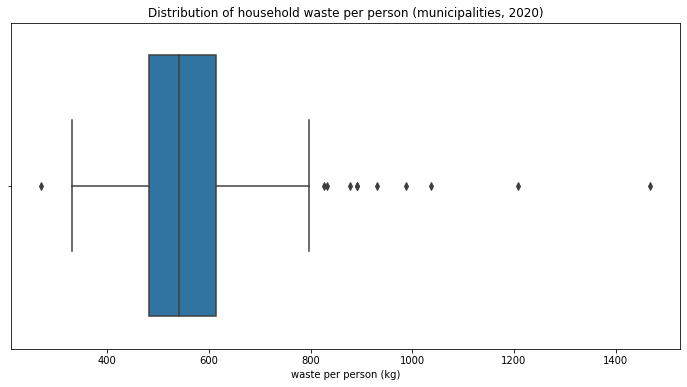

In [83]:
# Create a box plot of the distribution of total waste in 2020 (excluding zeros)

# Get the data
wpm2020 = waste_totals_per_municipality.loc[(waste_totals_per_municipality['period']==2020) & (waste_totals_per_municipality['waste_per_person_groupedtotal'] > 0), 'waste_per_person_groupedtotal']

# Create a plot
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(x = wpm2020).set(xlabel = 'waste per person (kg)') 
plt.title('Distribution of household waste per person (municipalities, 2020)')
plt.show()

We can see that the average is around 550 kg per person. (Note that this should *not* be interpreted as an average for the entire country. Besides missing data, different municipalities have different population sizes, and we would need to weight those.)

However, we also see a big spread, and with some quite extreme outliers. Let's check those.

In [84]:
# Show the top 5 of least waste per person in 2020
waste_totals_per_municipality.loc[(waste_totals_per_municipality['period']==2020) & (waste_totals_per_municipality['waste_per_person_groupedtotal'] > 0)].sort_values('waste_per_person_groupedtotal').head(5)


,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal
6519,6519,A025448,GM0946,2020,269.8,Total household waste,Nederweert,269.9
11199,11199,A025448,GM1896,2020,345.2,Total household waste,Zwartewaterland,331.5
2099,2099,A025448,GM0762,2020,349.1,Total household waste,Deurne,349.1
7779,7779,A025448,GM1667,2020,355.1,Total household waste,Reusel-De Mierden,354.9
859,859,A025448,GM0889,2020,362.6,Total household waste,Beesel,357.1


In [85]:
# Show the top 5 of moste waste per person in 2020
waste_totals_per_municipality.loc[(waste_totals_per_municipality['period']==2020) & (waste_totals_per_municipality['waste_per_person_groupedtotal'] > 0)].sort_values('waste_per_person_groupedtotal', ascending = False).head(5)


,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal
8319,8319,A025448,GM0088,2020,1467.2,Total household waste,Schiermonnikoog,1467.3
9079,9079,A025448,GM0448,2020,0.0,Total household waste,Texel,1207.7
8619,8619,A025448,GM1714,2020,1036.9,Total household waste,Sluis,1036.9
9539,9539,A025448,GM0717,2020,987.0,Total household waste,Veere,987.1
7719,7719,A025448,GM0703,2020,930.4,Total household waste,Reimerswaal,930.3


That's interesting. If you look at the top 5, you see multiple islands. A possible explanation (which is confirmed on the CBS website) is that these municipalities receive a lot of tourists. Tourism generates additional waste (without contributing to the size of the population).

For the municipalities on the low end, I do not really have an explanation at this point.


## 3.2 Total waste per person: trend over time

Next, let's take a look how the amount of total waste developed over time (2001 - 2020).

If we want to calculate this for the country as whole, we have some math to do: we would need a weighted average. That is, we need to combine the numbers per municipality with the sizes of the populations of those municipalities first, calculate totals, then divide by population sizes again. And even if we do that, the outcome will be to low - as we have missing data. We will do that nevertheless.

However, prior to that, let us first show the trend for a **selection of municipalities**. That is less effort, gives the possibility to work with complete data so the values will be correct. And - who knows - will give interesting insights.

We are going to make such municipality selection by at one hand ensuring that we take some for which we have good data, and ath the other hand also by ensuring that they are different types of municipalities, by considering the general demographic data (and some domain knowledge).

In [86]:
# Figure out for which municipalities there is data for all years
wtpm_yearcount = waste_totals_per_municipality[(waste_totals_per_municipality['waste_per_person_groupedtotal'] > 0)].groupby('municipality').size().reset_index(name = 'years_of_waste_data')

# Add municipality name
wtpm_yearcount = wtpm_yearcount.merge(mun_codes_and_names, how = 'left')

# Check the result
wtpm_yearcount.head(10)

,municipality,years_of_waste_data,municipality_name
0,GM0003,19,Appingedam
1,GM0005,17,Bedum
2,GM0007,16,Bellingwedde
3,GM0009,18,Ten Boer
4,GM0010,20,Delfzijl
5,GM0014,20,Groningen (gemeente)
6,GM0015,17,Grootegast
7,GM0017,16,Haren
8,GM0018,16,Hoogezand-Sappemeer
9,GM0022,17,Leek


Now let us take the general municipality data of 2020 to look at demographic information. But then make a first cut by excluding all municipalities for which we do not have all 20 years of data.

In [87]:
# Select general data of 2020
mun_candidates = municipality_data[municipality_data['period'] == 2020]

# Merge with info of the amount of years
mun_candidates = mun_candidates.merge(wtpm_yearcount, how = 'left')

# Select those for which there is 20 years of waste data
mun_candidates = mun_candidates[mun_candidates['years_of_waste_data'] == 20]

# Show a sample (to check)
mun_candidates.head(10)

,municipality,period,population,population_density,avg_household_size,avg_household_income,municipality_name,years_of_waste_data
2,GM0358,2020,31859.0,1584.0,2.39,59.8,Aalsmeer,20.0
7,GM0059,2020,27843.0,272.0,2.35,42.3,Achtkarspelen,20.0
10,GM0613,2020,25590.0,1180.0,2.40,58.3,Albrandswaard,20.0
17,GM1723,2020,10203.0,110.0,2.39,57.0,Alphen-Chaam,20.0
23,GM0307,2020,157276.0,2512.0,2.24,50.7,Amersfoort,20.0
25,GM0362,2020,91675.0,2229.0,2.09,56.4,Amstelveen,20.0
26,GM0363,2020,872757.0,5273.0,1.81,46.0,Amsterdam,20.0
31,GM0200,2020,163818.0,482.0,2.17,47.1,Apeldoorn,20.0
35,GM0202,2020,161348.0,1649.0,1.94,40.8,Arnhem,20.0
36,GM0106,2020,68599.0,838.0,2.12,42.7,Assen,20.0


In [88]:
# Count how many candidates we have left
mun_candidates.shape

(186, 8)

So we have 186 municipalities for which we have data for all 20 years. Of those we are going to select some.

We want to select:
* municipalities with different population sizes (large cities vs small towns)
* municipalities with different population densities (urbanized vs more rural areas)
* municipalities in different geographical regions

Below, we will do so by a combination of checking the data above and 'domain knowledge' of the author.

In [89]:
# Smallest population
mun_candidates.sort_values('population').head(10)

,municipality,period,population,population_density,avg_household_size,avg_household_income,municipality_name,years_of_waste_data
540,GM0088,2020,947.0,23.0,1.76,NaN,Schiermonnikoog,20.0
528,GM0277,2020,1704.0,61.0,2.48,NaN,Rozendaal,20.0
40,GM0744,2020,6859.0,90.0,2.21,48.9,Baarle-Nassau,20.0
441,GM1695,2020,7392.0,86.0,2.03,44.5,Noord-Beveland,20.0
416,GM0944,2020,7847.0,451.0,2.20,54.3,Mook en Middelaar,20.0
714,GM0638,2020,8605.0,406.0,2.36,57.1,Zoeterwoude,20.0
538,GM0279,2020,9880.0,717.0,2.47,52.7,Scherpenzeel,20.0
50,GM0370,2020,10022.0,142.0,2.43,59.9,Beemster,20.0
17,GM1723,2020,10203.0,110.0,2.39,57.0,Alphen-Chaam,20.0
483,GM0589,2020,10230.0,263.0,2.37,60.6,Oudewater,20.0


In [90]:
# Largest population
mun_candidates.sort_values('population', ascending = False).head(10)

,municipality,period,population,population_density,avg_household_size,avg_household_income,municipality_name,years_of_waste_data
26,GM0363,2020,872757.0,5273.0,1.81,46.0,Amsterdam,20.0
526,GM0599,2020,651157.0,2993.0,1.95,41.2,Rotterdam,20.0
223,GM0518,2020,545838.0,6620.0,2.00,44.3,'s-Gravenhage (gemeente),20.0
607,GM0344,2020,357597.0,3811.0,1.95,47.5,Utrecht (gemeente),20.0
228,GM0014,2020,232874.0,1255.0,1.69,39.6,Groningen (gemeente),20.0
596,GM0855,2020,219789.0,1892.0,1.98,42.8,Tilburg,20.0
438,GM0268,2020,177659.0,3346.0,1.81,41.2,Nijmegen,20.0
31,GM0200,2020,163818.0,482.0,2.17,47.1,Apeldoorn,20.0
235,GM0392,2020,162902.0,5585.0,2.06,48.9,Haarlem,20.0
35,GM0202,2020,161348.0,1649.0,1.94,40.8,Arnhem,20.0


In [91]:
# Lowest population density
mun_candidates.sort_values('population_density').head(10)

,municipality,period,population,population_density,avg_household_size,avg_household_income,municipality_name,years_of_waste_data
540,GM0088,2020,947.0,23.0,1.76,NaN,Schiermonnikoog,20.0
528,GM0277,2020,1704.0,61.0,2.48,NaN,Rozendaal,20.0
669,GM1701,2020,19460.0,70.0,2.17,47.9,Westerveld,20.0
441,GM1695,2020,7392.0,86.0,2.03,44.5,Noord-Beveland,20.0
40,GM0744,2020,6859.0,90.0,2.21,48.9,Baarle-Nassau,20.0
705,GM0050,2020,22653.0,92.0,2.33,50.1,Zeewolde,20.0
91,GM1681,2020,25559.0,93.0,2.25,45.6,Borger-Odoorn,20.0
444,GM0171,2020,47291.0,103.0,2.37,46.7,Noordoostpolder,20.0
693,GM1690,2020,24330.0,108.0,2.35,50.6,De Wolden,20.0
17,GM1723,2020,10203.0,110.0,2.39,57.0,Alphen-Chaam,20.0


In [92]:
# Highest population density
mun_candidates.sort_values('population_density', ascending = False).head(10)

,municipality,period,population,population_density,avg_household_size,avg_household_income,municipality_name,years_of_waste_data
223,GM0518,2020,545838.0,6620.0,2.00,44.3,'s-Gravenhage (gemeente),20.0
235,GM0392,2020,162902.0,5585.0,2.06,48.9,Haarlem,20.0
26,GM0363,2020,872757.0,5273.0,1.81,46.0,Amsterdam,20.0
539,GM0606,2020,78730.0,4417.0,2.07,41.9,Schiedam,20.0
607,GM0344,2020,357597.0,3811.0,1.95,47.5,Utrecht (gemeente),20.0
713,GM0637,2020,125285.0,3637.0,2.22,47.4,Zoetermeer,20.0
297,GM0405,2020,73261.0,3595.0,2.19,46.0,Hoorn,20.0
485,GM0590,2020,32136.0,3414.0,2.27,49.2,Papendrecht,20.0
454,GM0579,2020,24840.0,3399.0,2.27,65.0,Oegstgeest,20.0
438,GM0268,2020,177659.0,3346.0,1.81,41.2,Nijmegen,20.0


In [93]:
# Get mean values
mun_candidates.mean()

period                   2020.000000
population              55582.252688
population_density        895.865591
avg_household_size          2.241828
avg_household_income       50.341848
years_of_waste_data        20.000000
dtype: float64

In [94]:
# Get median values
mun_candidates.median()

period                   2020.00
population              28918.00
population_density        520.00
avg_household_size          2.26
avg_household_income       49.50
years_of_waste_data        20.00
dtype: float64

In [95]:
# Show some municipalities with a fairly low population (and quite average population density)
mun_candidates[(mun_candidates['population'].between(30000, 50000)) & (mun_candidates['population_density'].between(300, 800))].head(10)

,municipality,period,population,population_density,avg_household_size,avg_household_income,municipality_name,years_of_waste_data
76,GM0310,2020,43137.0,652.0,2.20,61.1,De Bilt,20.0
97,GM0757,2020,30801.0,483.0,2.22,52.5,Boxtel,20.0
115,GM0383,2020,35986.0,724.0,2.25,56.5,Castricum,20.0
165,GM0385,2020,36197.0,666.0,2.42,57.5,Edam-Volendam,20.0
185,GM0777,2020,43878.0,793.0,2.30,48.6,Etten-Leur,20.0
210,GM0664,2020,38082.0,411.0,2.10,45.9,Goes,20.0
279,GM0797,2020,44692.0,567.0,2.32,51.4,Heusden,20.0
347,GM0327,2020,30401.0,519.0,2.30,56.2,Leusden,20.0
398,GM0119,2020,33920.0,611.0,2.16,45.1,Meppel,20.0
437,GM0267,2020,43171.0,623.0,2.45,54.9,Nijkerk,20.0


In [96]:
# Show some municipalities with a medium-size population (and quite average population density)
mun_candidates[(mun_candidates['population'].between(80000, 120000)) & (mun_candidates['population_density'].between(300, 800))].head(10)

,municipality,period,population,population_density,avg_household_size,avg_household_income,municipality_name,years_of_waste_data
131,GM0150,2020,100719.0,771.0,2.12,44.3,Deventer,20.0
166,GM0228,2020,117165.0,368.0,2.34,50.9,Ede,20.0
179,GM0114,2020,107048.0,319.0,2.16,41.8,Emmen,20.0
475,GM0828,2020,91915.0,563.0,2.25,48.0,Oss,20.0


In [97]:
# Show some municipalities with a low to medium population (and not too low population density)
mun_candidates[(mun_candidates['population'].between(40000, 80000)) & (mun_candidates['population_density'].between(500, 1000))].head(10)

,municipality,period,population,population_density,avg_household_size,avg_household_income,municipality_name,years_of_waste_data
36,GM0106,2020,68599.0,838.0,2.12,42.7,Assen,20.0
62,GM0748,2020,67496.0,844.0,2.17,45.4,Bergen op Zoom,20.0
76,GM0310,2020,43137.0,652.0,2.20,61.1,De Bilt,20.0
185,GM0777,2020,43878.0,793.0,2.30,48.6,Etten-Leur,20.0
270,GM0530,2020,40142.0,977.0,2.21,48.3,Hellevoetsluis,20.0
279,GM0797,2020,44692.0,567.0,2.32,51.4,Heusden,20.0
300,GM0321,2020,50146.0,913.0,2.46,57.4,Houten,20.0
437,GM0267,2020,43171.0,623.0,2.45,54.9,Nijkerk,20.0
445,GM0575,2020,43508.0,745.0,2.16,56.0,Noordwijk,20.0
468,GM0826,2020,55982.0,783.0,2.22,48.2,Oosterhout,20.0


Based on the data above, we will select the following municipalities:
* **Amsterdam**. The capital, highest population and a high population density.
* **Tilburg**. A fairly large city. Also a high population density.
* **Ede**. A municipality with an average number of inhabitants, but a fairly low population density as it includes many villages spread over a large area. 
* **Houten**. A smaller (affluent) town, but without a large surrounding area so a higher population density.
* **Noordoostpolder** . A municipality with a large, sparsely populated area.

(And, by the way, Ede is where the author of this study grew up :-).

Let's show their demographic data.

In [98]:
# Municipality selection 
selected_municipalities = ['Amsterdam', 'Tilburg','Ede', 'Houten', 'Noordoostpolder']

# Show demographic data of the selection (sorted by population size)
mun_candidates[mun_candidates['municipality_name'].isin(selected_municipalities)].sort_values('population', ascending = False)

,municipality,period,population,population_density,avg_household_size,avg_household_income,municipality_name,years_of_waste_data
26,GM0363,2020,872757.0,5273.0,1.81,46.0,Amsterdam,20.0
596,GM0855,2020,219789.0,1892.0,1.98,42.8,Tilburg,20.0
166,GM0228,2020,117165.0,368.0,2.34,50.9,Ede,20.0
300,GM0321,2020,50146.0,913.0,2.46,57.4,Houten,20.0
444,GM0171,2020,47291.0,103.0,2.37,46.7,Noordoostpolder,20.0


For these five municipalities, let us plot the amount of waste (per person) over the years.

In [99]:
# Select the data for the selected municipalities
wtpc_sel = waste_totals_per_municipality[waste_totals_per_municipality['municipality_name'].isin(selected_municipalities)]

# Show a small sample (for checking)
wtpc_sel.sample(5, random_state = 3)

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal
9173,9173,A025448,GM0855,2014,428.5,Total household waste,Tilburg,428.0
6827,6827,A025448,GM0171,2008,642.9,Total household waste,Noordoostpolder,619.7
446,446,A025448,GM0363,2007,481.6,Total household waste,Amsterdam,481.6
6824,6824,A025448,GM0171,2005,654.5,Total household waste,Noordoostpolder,654.4
9176,9176,A025448,GM0855,2017,424.7,Total household waste,Tilburg,424.6


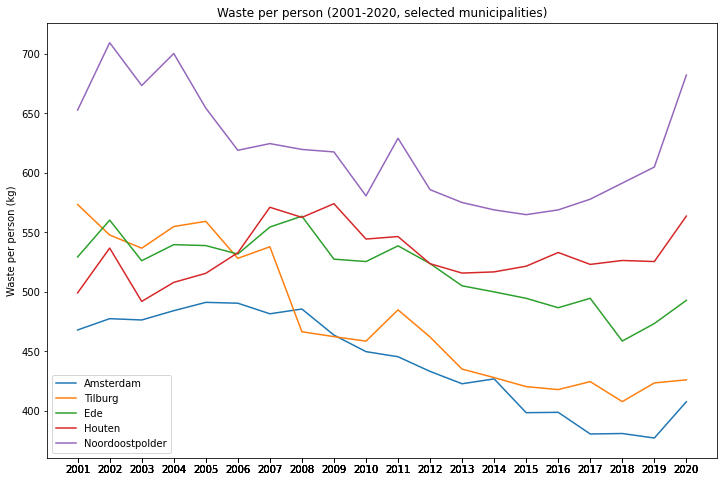

In [100]:
# Create a line chart of the trend over time for waste per person
fig, ax = plt.subplots(figsize = (12,8))

for mun in selected_municipalities:
    plt.plot(wtpc_sel[wtpc_sel['municipality_name']==mun]['period'],wtpc_sel[wtpc_sel['municipality_name']==mun]['waste_per_person_groupedtotal'])

ax.set_xticks(wtpc_sel['period'])
ax.set_ylabel('Waste per person (kg)')
#plt.ylim(0, 800)
plt.title('Waste per person (2001-2020, selected municipalities)')
plt.legend(selected_municipalities)
plt.show()

What we observe: 
* For most municipalities we see a peak of waste per person around 2004, and then a downward trend.
* However, suddenly in 2020, the amount rises again.
* The large cities in the selection have a lower waste per person.

While it is interesting to see, we must be very careful to draw too many conclusions from such a small selection. Without knowing (or speculating about) a cause, good to see the gradual decline over the years. For the rise in 2020, a possible explanation may be the covid-19 pandemic. It was on the news back then that lots of people used the lockdowns to clear out their houses.

**Adding: trend line (2001 - 2002) for the entire country**

As mentioned above, we can (and will) also get a graph for the entire country. By combining the 'per-person' numbers that we have for the municipalities with the population-sizes for those municipalities. And then calculating values for the entire country - while acknowledging that missing data will give numbers that are too low.

In [101]:
# Sample of data that we will enrich
waste_totals_per_municipality.head(5)

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal
0,0,A025448,GM1680,2001,724.4,Total household waste,Aa en Hunze,724.6
1,1,A025448,GM1680,2002,0.0,Total household waste,Aa en Hunze,0.0
2,2,A025448,GM1680,2003,0.0,Total household waste,Aa en Hunze,0.0
3,3,A025448,GM1680,2004,0.0,Total household waste,Aa en Hunze,657.4
4,4,A025448,GM1680,2005,782.5,Total household waste,Aa en Hunze,782.3


In [102]:
# Sample of data to enrich with
municipality_data.head(5)

,municipality,period,population,population_density,avg_household_size,avg_household_income,municipality_name
0,GM1680,2001,25208.0,91.0,2.43,NaN,Aa en Hunze
1,GM1680,2002,25552.0,92.0,2.43,NaN,Aa en Hunze
2,GM1680,2003,25305.0,91.0,2.41,NaN,Aa en Hunze
3,GM1680,2004,25218.0,91.0,2.40,NaN,Aa en Hunze
4,GM1680,2005,25329.0,91.0,2.40,NaN,Aa en Hunze


In [103]:
# Merge these two into a new dataframe
waste_totals_per_municipality_enriched = waste_totals_per_municipality.merge(municipality_data, how = 'left')

# Show a sample to check
waste_totals_per_municipality_enriched.head(5)

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal,population,population_density,avg_household_size,avg_household_income
0,0,A025448,GM1680,2001,724.4,Total household waste,Aa en Hunze,724.6,25208.0,91.0,2.43,NaN
1,1,A025448,GM1680,2002,0.0,Total household waste,Aa en Hunze,0.0,25552.0,92.0,2.43,NaN
2,2,A025448,GM1680,2003,0.0,Total household waste,Aa en Hunze,0.0,25305.0,91.0,2.41,NaN
3,3,A025448,GM1680,2004,0.0,Total household waste,Aa en Hunze,657.4,25218.0,91.0,2.40,NaN
4,4,A025448,GM1680,2005,782.5,Total household waste,Aa en Hunze,782.3,25329.0,91.0,2.40,NaN


Let's check how much missing data we have.

In [104]:
# Show amount of available data for all columns
waste_totals_per_municipality_enriched.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11240 entries, 0 to 11239
Data columns (total 12 columns):
ID                               11240 non-null int64
waste_type                       11240 non-null object
municipality                     11240 non-null object
period                           11240 non-null int32
waste_per_person_total           8559 non-null float64
waste_name                       11240 non-null object
municipality_name                11240 non-null object
waste_per_person_groupedtotal    11240 non-null float64
population                       8560 non-null float64
population_density               8560 non-null float64
avg_household_size               8560 non-null float64
avg_household_income             3899 non-null float64
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 1.1+ MB


In [105]:
# Check if we ever have a population of 'zero', as that would result in a division-by-zero error later on
print(waste_totals_per_municipality_enriched[waste_totals_per_municipality_enriched['population']== 0.0])

Empty DataFrame
Columns: [ID, waste_type, municipality, period, waste_per_person_total, waste_name, municipality_name, waste_per_person_groupedtotal, population, population_density, avg_household_size, avg_household_income]
Index: []


Not the case fortunately.

In [106]:
# Take the rows where the population is NaN
missing_population = waste_totals_per_municipality_enriched[waste_totals_per_municipality_enriched['population'].isnull()]

# Show a sample
missing_population.sample(10, random_state = 1)

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal,population,population_density,avg_household_size,avg_household_income
914,914,A025448,GM0372,2015,NaN,Total household waste,Bennebroek,0.0,NaN,NaN,NaN,NaN
6096,6096,A025448,GM0559,2017,NaN,Total household waste,Middelharnis,0.0,NaN,NaN,NaN,NaN
10816,10816,A025448,GM0710,2017,NaN,Total household waste,Wûnseradiel,0.0,NaN,NaN,NaN,NaN
2195,2195,A025448,GM0219,2016,NaN,Total household waste,Dinxperlo,0.0,NaN,NaN,NaN,NaN
7118,7118,A025448,GM0174,2019,NaN,Total household waste,Olst,0.0,NaN,NaN,NaN,NaN
4387,4387,A025448,GM1911,2008,NaN,Total household waste,Hollands Kroon,0.0,NaN,NaN,NaN,NaN
2395,2395,A025448,GM0316,2016,NaN,Total household waste,Driebergen-Rijsenburg,0.0,NaN,NaN,NaN,NaN
8174,8174,A025448,GM0704,2015,NaN,Total household waste,Sas van Gent,0.0,NaN,NaN,NaN,NaN
10126,10126,A025448,GM0630,2007,NaN,Total household waste,Wateringen,0.0,NaN,NaN,NaN,NaN
3336,3336,A025448,GM0365,2017,NaN,Total household waste,Graft-De Rijp,0.0,NaN,NaN,NaN,NaN


For each of those rows where we don't have a population, we also don't have waste numbers. So that may not be relevant. It may, again, be rows for years that municipalities did not exist. Let's see if that is always the case.

In [107]:
# Check if we have any rows where the population is unknown, but we do have waste data.
missing_population = waste_totals_per_municipality_enriched[(waste_totals_per_municipality_enriched['population'].isnull()) & (waste_totals_per_municipality_enriched['waste_per_person_groupedtotal'] > 0)]
len(missing_population)

0

So it looks like we have a population for all rows where we have a number for total waste (waste_per_person_groupedtotal).

That enables us to calculate additional columns.

In [108]:
# Add a column that represents the total amount of waste for a community (for the entire population)
waste_totals_per_municipality_enriched['total_waste'] = waste_totals_per_municipality_enriched['population'] * waste_totals_per_municipality_enriched['waste_per_person_groupedtotal']

# Show a sample (to check)
waste_totals_per_municipality_enriched.sample(5, random_state = 1)

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal,population,population_density,avg_household_size,avg_household_income,total_waste
599,599,A025448,GM0202,2020,492.2,Total household waste,Arnhem,491.3,161348.0,1649.0,1.94,40.8,79270272.4
223,223,A025448,GM0361,2004,503.1,Total household waste,Alkmaar,503.0,94121.0,3190.0,2.18,NaN,47342863.0
6647,6647,A025448,GM0571,2008,500.3,Total household waste,Nieuw-Lekkerland,500.4,9503.0,912.0,2.86,NaN,4755301.2
4124,4124,A025448,GM0531,2005,700.9,Total household waste,Hendrik-Ido-Ambacht,697.8,23690.0,2208.0,2.58,NaN,16530882.0
8359,8359,A025448,GM0962,2020,NaN,Total household waste,Schinnen,0.0,NaN,NaN,NaN,NaN,NaN


We can now group-by-year, resulting in a total amount of waste and a total population per year, for the entire country.
And by dividing those two, we get waste-per-person for the entire country.

In [109]:
# Group by year: total waste and population
waste_totals_per_year = waste_totals_per_municipality_enriched.groupby(['period'])['population','total_waste'].agg('sum').reset_index()

# Calculate waste-per-person
waste_totals_per_year['waste_per_person'] = waste_totals_per_year['total_waste'] / waste_totals_per_year['population']

# Show the result
waste_totals_per_year

,period,population,total_waste,waste_per_person
0,2001,15987075.0,8.568785e+09,535.982035
1,2002,16105285.0,8.538030e+09,530.138410
2,2003,16192572.0,8.387034e+09,517.955646
3,2004,16258032.0,8.479638e+09,521.566098
4,2005,16305526.0,8.830526e+09,541.566460
5,2006,16334210.0,8.717202e+09,533.677598
6,2007,16357992.0,8.987341e+09,549.415935
7,2008,16405399.0,8.707099e+09,530.745961
8,2009,16485787.0,8.674463e+09,526.178287
9,2010,16574989.0,8.451488e+09,509.894048


Reminder: the absolute values will be too low due to missing data for waste.

Nevertheless, let us the same line chart again as above, for the selected municipalities, and as addition the trend line for the country as a whole.

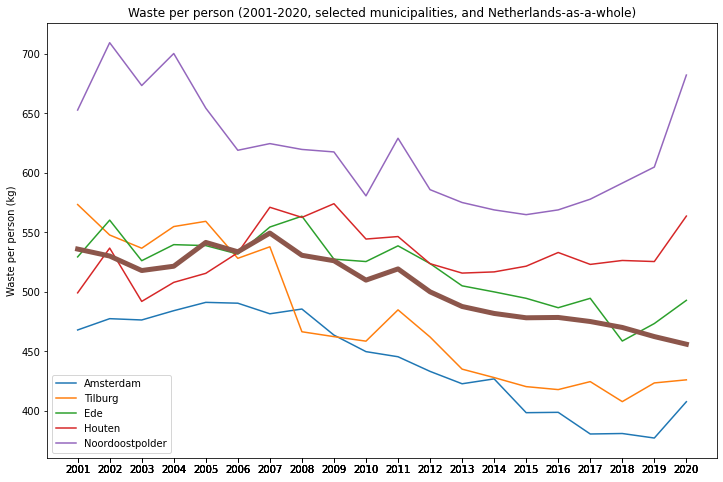

In [110]:
# Create a line chart of the trend over time for waste per person
fig, ax = plt.subplots(figsize = (12,8))

for mun in selected_municipalities:
    plt.plot(wtpc_sel[wtpc_sel['municipality_name']==mun]['period'],wtpc_sel[wtpc_sel['municipality_name']==mun]['waste_per_person_groupedtotal'])

# Add additional line for the country as a whole    
plt.plot(waste_totals_per_year['period'], waste_totals_per_year['waste_per_person'], linewidth = 5)    
    
ax.set_xticks(wtpc_sel['period'])
ax.set_ylabel('Waste per person (kg)')
#plt.ylim(0, 800)
plt.title('Waste per person (2001-2020, selected municipalities, and Netherlands-as-a-whole)')
plt.legend(selected_municipalities)
plt.show()


From this additional line of the total waste per person as calculated over the entire country we mostly observe a similar pattern that we saw already for the sample municipalities: an upward trend in the first years after 2000, and a downward trend since.

We do not see the sudden increase in 2020 though. One possible explanation is missing data (which we know there is), but this would require further investigation (which we will not do now).

## 3.3 Breakdown of waste (waste types)

While in the previous section we looked at the total amount of waste (per person), let us know take a look at the breakdown (different waste types).

We will look at two sample municipalities (Ede and Amsterdam) first as we may see a different pattern actually between big cities and municipalities with a larger 'green' area. After that we will also do this for the entire country together again.

We will concentrate on the most recent year that we have data for: 2020.

In [111]:
# Get subset of data: waste per waste type (so not including the total row), for selected municipalities, for 2020
wwt_2020 = waste_without_totals[(waste_without_totals['municipality_name'].isin(selected_municipalities)) & (waste_without_totals['period'] == 2020)].copy()

# Get number of rows (to check)
len(wwt_2020)

175

In [112]:
# Get subset for Ede
wwt_2020_ede = wwt_2020[(wwt_2020['municipality_name'] == 'Ede') & (wwt_2020['waste_per_person'].notna())].copy()
wwt_2020_ede.sort_values('waste_per_person', ascending = True, inplace = True)

# Show the result in table format
wwt_2020_ede

,ID,waste_type,municipality,period,waste_per_person,waste_name,municipality_name
373499,373499,A025484,GM0228,2020,0.0,Gas bottles and fire extinguishers,Ede
362259,362259,A025483,GM0228,2020,0.1,Styrofoam,Ede
159939,159939,A025464,GM0228,2020,0.1,Frying fat and oil,Ede
351019,351019,A025482,GM0228,2020,0.2,Car tires,Ede
328539,328539,A025480,GM0228,2020,0.4,Asbestos -containing waste,Ede
294819,294819,A025477,GM0228,2020,0.4,Flat glass,Ede
227379,227379,A025471,GM0228,2020,0.7,Carpeting,Ede
306059,306059,A025478,GM0228,2020,0.9,Bitumen -containing roofing,Ede
238619,238619,A025472,GM0228,2020,0.9,Mattress,Ede
317299,317299,A025479,GM0228,2020,1.1,Cast,Ede


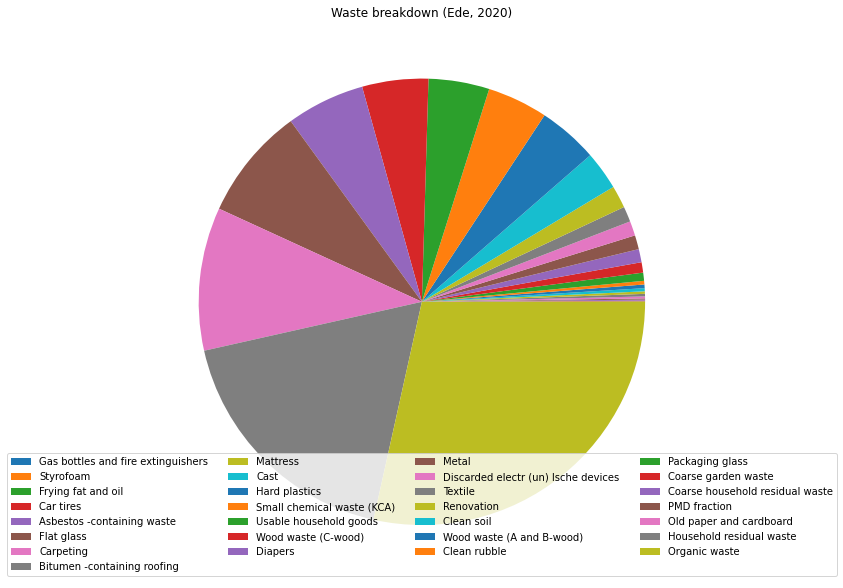

In [113]:
# Show the result as a pie-chart
fig, ax = plt.subplots(figsize = (10,20))

plt.pie(wwt_2020_ede['waste_per_person'])
plt.title('Waste breakdown (Ede, 2020)')
plt.legend(wwt_2020_ede['waste_name'], loc = 'lower center', ncol = 4)
plt.show()

Beautiful, but better show as a bar chart due to the similar colors

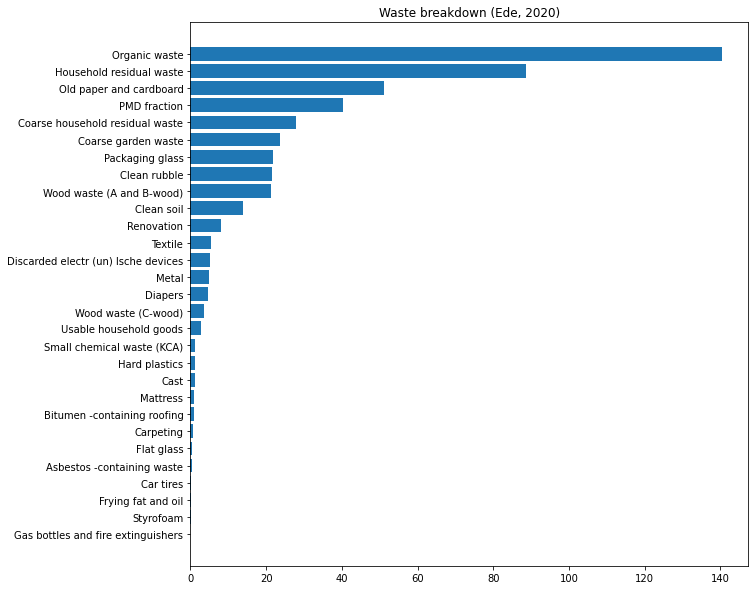

In [114]:
# Show the result as a horizontal bar chart
fig, ax = plt.subplots(figsize = (10,10))

plt.barh(wwt_2020_ede['waste_name'], width = wwt_2020_ede['waste_per_person'])
plt.title('Waste breakdown (Ede, 2020)')
plt.show()

Let's get a similar bar chart for Amsterdam.

In [115]:
# Get subset for Amsterdam
wwt_2020_ams = wwt_2020[(wwt_2020['municipality_name'] == 'Amsterdam') & (wwt_2020['waste_per_person'].notna())].copy()
wwt_2020_ams.sort_values('waste_per_person', ascending = True, inplace = True)
# wwt_2020_ams

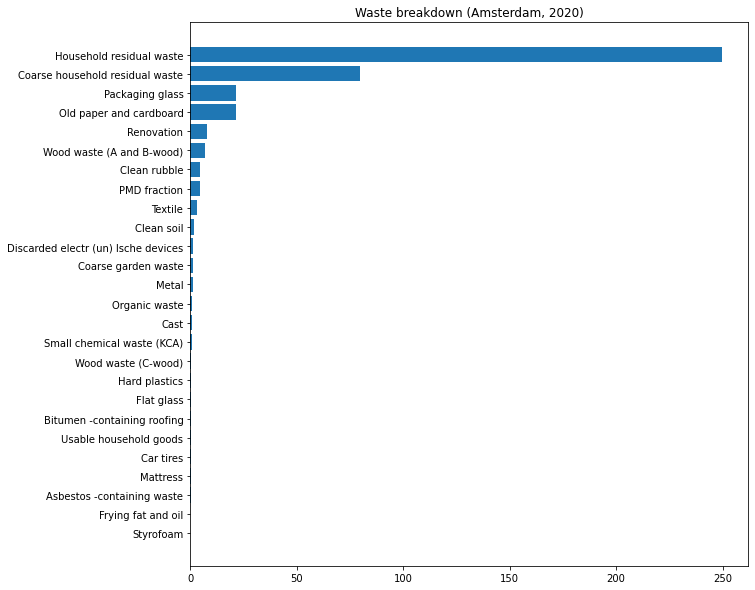

In [116]:
# Show the result as a horizontal bar chart
fig, ax = plt.subplots(figsize = (10,10))

plt.barh(wwt_2020_ams['waste_name'], width = wwt_2020_ams['waste_per_person'])
plt.title('Waste breakdown (Amsterdam, 2020)')
plt.show()

Interesting to observe the differences:
* For big city Amsterdam, the vast majority of waste is "Household residual waste"
* For Ede having a lot of green, "Organic waste" is the biggest pie

**Waste breakdown for the entire country (2020)**

To get a breakdown for the entire country, we need to combine some earlier created data.

In [117]:
# Show sample again
waste_and_general.sample(5, random_state = 1)

,ID,waste_type,municipality,period,waste_per_person,waste_name,municipality_name,population,population_density,avg_household_size,avg_household_income
251346,251346,A025473,GM0163,2007,51.4,Clean rubble,Hellendoorn,36046.0,261.0,2.57,NaN
255271,255271,A025473,GM0957,2012,49.5,Clean rubble,Roermond,56165.0,923.0,2.11,33.9
315679,315679,A025479,GM0491,2020,NaN,Cast,Bergambacht,NaN,NaN,NaN,NaN
223650,223650,A025470,GM0291,2011,NaN,Hard plastics,Warnsveld,NaN,NaN,NaN,NaN
182224,182224,A025467,GM0316,2005,0.0,Coarse garden waste,Driebergen-Rijsenburg,18575.0,705.0,2.29,NaN


In [118]:
# As before, we should remove 'total' and for 'eindverwerkt afval'
waste_type_total = 'A025448'
waste_type_eindverwerktafval = 'A025488'

waste_and_general_without_totals = waste_and_general[(waste_and_general['waste_type'] != waste_type_total) & (waste_and_general['waste_type'] != waste_type_eindverwerktafval)].copy()

wg_2020 = waste_and_general_without_totals[waste_and_general_without_totals['period']==2020].copy()
wg_2020['waste_all_persons'] = wg_2020['waste_per_person']*wg_2020['population']

# Sample of waste breakdown per municipality for 2020 (incl general data)
wg_2020.sample(5, random_state = 1)

,ID,waste_type,municipality,period,waste_per_person,waste_name,municipality_name,population,population_density,avg_household_size,avg_household_income,waste_all_persons
203279,203279,A025469,GM0491,2020,NaN,Usable household goods,Bergambacht,NaN,NaN,NaN,NaN,NaN
195759,195759,A025468,GM0166,2020,7.2,Discarded electr (un) Ische devices,Kampen,54319.0,382.0,2.41,46.0,391096.8
234559,234559,A025471,GM0096,2020,0.0,Carpeting,Vlieland,1155.0,30.0,1.77,NaN,0.0
302579,302579,A025477,GM1969,2020,0.6,Flat glass,Westerkwartier,63329.0,175.0,2.36,47.1,37997.4
269299,269299,A025474,GM0351,2020,8.9,Wood waste (A and B-wood),Woudenberg,13362.0,366.0,2.54,56.1,118921.8


In [119]:
# Group by waste type (get total value per waste_type)
waste_2020_per_type = wg_2020.groupby(['waste_type','waste_name'])['waste_all_persons'].agg('sum').reset_index()

# Get the population of 2020
population2020 = municipality_data[municipality_data['period']==2020]['population'].sum()

# Divide, to get the total waste per waste type per person
waste_2020_per_type['waste_per_person'] = waste_2020_per_type['waste_all_persons'] / population2020

# Sort, and show the 5 highest values
waste_2020_per_type.sort_values('waste_per_person', ascending = True, inplace = True)
waste_2020_per_type.tail(5)

,waste_type,waste_name,waste_all_persons,waste_per_person
21,A025473,Clean rubble,4.473798e+08,25.700281
1,A025451,Coarse household residual waste,4.977754e+08,28.595319
4,A025455,Old paper and cardboard,7.282538e+08,41.835427
3,A025454,Organic waste,1.489141e+09,85.545541
0,A025450,Household residual waste,2.578792e+09,148.141835


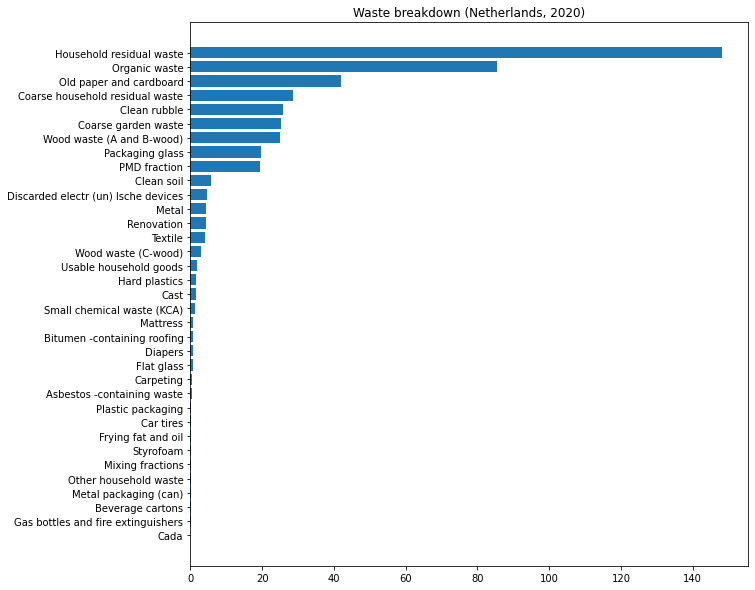

In [120]:
# Show the result as a horizontal bar chart
fig, ax = plt.subplots(figsize = (10,10))

plt.barh(waste_2020_per_type['waste_name'], width = waste_2020_per_type['waste_per_person'])
plt.title('Waste breakdown (Netherlands, 2020)')

plt.show()

What we can observe, is that for Netherlands-as-a-whole, in 2020, the top 3 of types of waste is:
* residual waste
* organic waste
* old paper and cardboard

## 3.4 Breakdown of waste: trend over time

For some insight in any trends of the breakdown of waste (per waste type), over time, let's take the data of one of the sample municipalities: Ede.

In [121]:
# Get the waste data (per type) for Ede for all years
wwt_ede = waste_without_totals[(waste_without_totals['municipality_name'] == 'Ede') & (waste_without_totals['waste_per_person'].notna())].copy()

In [122]:
# Show a sample
wwt_ede.head(50)

,ID,waste_type,municipality,period,waste_per_person,waste_name,municipality_name
13800,13800,A025450,GM0228,2001,314.3,Household residual waste,Ede
13801,13801,A025450,GM0228,2002,283.4,Household residual waste,Ede
13802,13802,A025450,GM0228,2003,247.1,Household residual waste,Ede
13803,13803,A025450,GM0228,2004,252.1,Household residual waste,Ede
13804,13804,A025450,GM0228,2005,239.7,Household residual waste,Ede
13805,13805,A025450,GM0228,2006,225.5,Household residual waste,Ede
13806,13806,A025450,GM0228,2007,236.0,Household residual waste,Ede
13807,13807,A025450,GM0228,2008,231.7,Household residual waste,Ede
13808,13808,A025450,GM0228,2009,214.2,Household residual waste,Ede
13809,13809,A025450,GM0228,2010,221.8,Household residual waste,Ede


From the data above, we can actually see already that the amount of residual waste appears to have decreased a lot over the years.

Let's create a stack plot to see the breakdown over the years.

In [123]:
# To be able to create a stack plot, there should not be any missing values.
# That is, for every combination of year and waste_name there should be a value.
# Let's check that.

nrofyears = wwt_ede['period'].unique()
print('Nr of years:', len(nrofyears))
nrofwastetypes = wwt_ede['waste_name'].unique()
print('Nr of waste types:', len(nrofwastetypes))
print('Expected nr of rows:', len(nrofwastetypes)*len(nrofyears))
print('Actual nr of rows:', len(wwt_ede))

Nr of years: 20
Nr of waste types: 33
Expected nr of rows: 660
Actual nr of rows: 484


In [124]:
# Set missing values to 0
wwt_ede_zerofilled = wwt_ede.set_index(['period','waste_name']).unstack(fill_value=0).stack().reset_index()
print ('Number of rows after adding (should be 660):', len(wwt_ede_zerofilled))

Number of rows after adding (should be 660): 660


In [125]:
# To enable stack plotting, reshape this data
wwt_ede_list = wwt_ede_zerofilled.groupby('waste_name')['waste_per_person'].apply(list)
wwt_ede_dict = wwt_ede_list.to_dict()

In [126]:
# Show a sample
wwt_ede_list[0:3]

waste_name
Asbestos -containing waste     [2.0, 2.3, 1.5, 1.1, 0.8, 0.6, 0.8, 0.7, 0.4, ...
Beverage cartons               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Bitumen -containing roofing    [0.0, 0.8, 1.0, 0.6, 0.9, 1.2, 1.2, 1.2, 1.1, ...
Name: waste_per_person, dtype: object

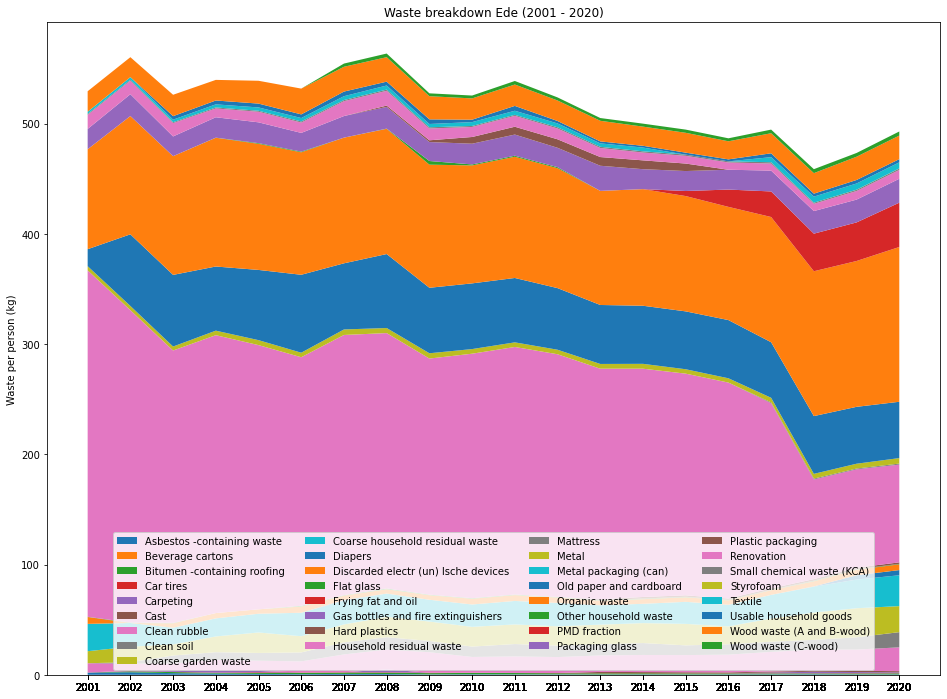

In [127]:
# Create a stack plot of the trend over time for waste breakdown
fig, ax = plt.subplots(figsize = (16,12))

x = wwt_ede['period'].unique()

ax.stackplot(x, wwt_ede_dict.values(), labels = wwt_ede_dict.keys())
ax.set_xticks(wwt_ede['period'])
ax.set_ylabel('Waste per person (kg)')
ax.legend(loc = 'lower center', ncol = 4)
plt.title('Waste breakdown Ede (2001 - 2020)')

plt.show()

It is not directly easy to analyze things from this graph with a lot of detail. However we can indeed see that residual waste significantly decreased over the years.

It would take more graphs and tables (e.g. for the individual waste types) to assess better which waste significantly increased or decreased over time. (We will not do this now.)

## 3.5 Correlation with general municipality data

We already saw that for different municipalities there are very significant differences in the amount of waste that is being collected. And from some examples saw that larger cities appear to have less waste per person than more rural areas.

Let us now take a look whether we can find correlations between the amount of waste and general (demographic) data. We will do this for the total amount of waste per person, for 2020.

In [128]:
# Show a sample of the dataframe that we created earlier that we can reuse
waste_totals_per_municipality_enriched.sample(5, random_state = 1)

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal,population,population_density,avg_household_size,avg_household_income,total_waste
599,599,A025448,GM0202,2020,492.2,Total household waste,Arnhem,491.3,161348.0,1649.0,1.94,40.8,79270272.4
223,223,A025448,GM0361,2004,503.1,Total household waste,Alkmaar,503.0,94121.0,3190.0,2.18,NaN,47342863.0
6647,6647,A025448,GM0571,2008,500.3,Total household waste,Nieuw-Lekkerland,500.4,9503.0,912.0,2.86,NaN,4755301.2
4124,4124,A025448,GM0531,2005,700.9,Total household waste,Hendrik-Ido-Ambacht,697.8,23690.0,2208.0,2.58,NaN,16530882.0
8359,8359,A025448,GM0962,2020,NaN,Total household waste,Schinnen,0.0,NaN,NaN,NaN,NaN,NaN


In [129]:
# Select the 2020 data
waste_permun_2020 = waste_totals_per_municipality_enriched[waste_totals_per_municipality_enriched['period']==2020]

# Drop the rows for which we have no waste data
waste_permun_2020 = waste_permun_2020[waste_permun_2020['waste_per_person_groupedtotal'] > 0.0]

# Select the subset of (numeric) columns for which we want to identify whether there is a correlation
waste_permun_2020_relcol =waste_permun_2020[['waste_per_person_groupedtotal', 'population', 'population_density', 'avg_household_size', 'avg_household_income']]

# Show a small sample (to check)
waste_permun_2020_relcol.head(5)

,waste_per_person_groupedtotal,population,population_density,avg_household_size,avg_household_income
19,694.2,25445.0,92.0,2.23,49.4
59,541.6,31859.0,1584.0,2.39,59.8
79,465.9,27121.0,281.0,2.31,46.4
139,877.4,27843.0,272.0,2.35,42.3
179,522.7,20165.0,2297.0,2.43,48.3


In [130]:
# Get correlation between waste_per_person_groupedtotal and other data
corr = waste_permun_2020_relcol.corr() ['waste_per_person_groupedtotal']
print(corr)

waste_per_person_groupedtotal    1.000000
population                      -0.191966
population_density              -0.245346
avg_household_size              -0.126051
avg_household_income            -0.131261
Name: waste_per_person_groupedtotal, dtype: float64


Observations (in the seqence of the strenght of the correlation):
* (-0.245) the more densily populated, the lower the waste per person
* (-0.192) the larger the population, the lower the waste per person
* (-0.131) the higher the average household income, the lower the waste per person
* (-0.126) the larger the average family, the lower the waste per person

The first two of those we also saw when we looked at the waste per person for 5 selected municipalities.
The third one (household income) is a mild surprise to me. The correlation is not that strong.

And we should be very careful to draw any conclusions from this anyway. Possibly there are other factors that have a much larger influence that we do not see here. Note that earlier we also saw that tourism plays a role! And then even, whatever we see here, should not be seen as 'cause': it's not that people in big cities are less polluting because they live in a big city, but e.g. because they don't have much green space and therefore not the organic garden waste that people have in rural areas.

Much more study would be required.

Nevertheless, for the 'population density' and 'household income', let's draw some scatter plots to see if we can learn more.

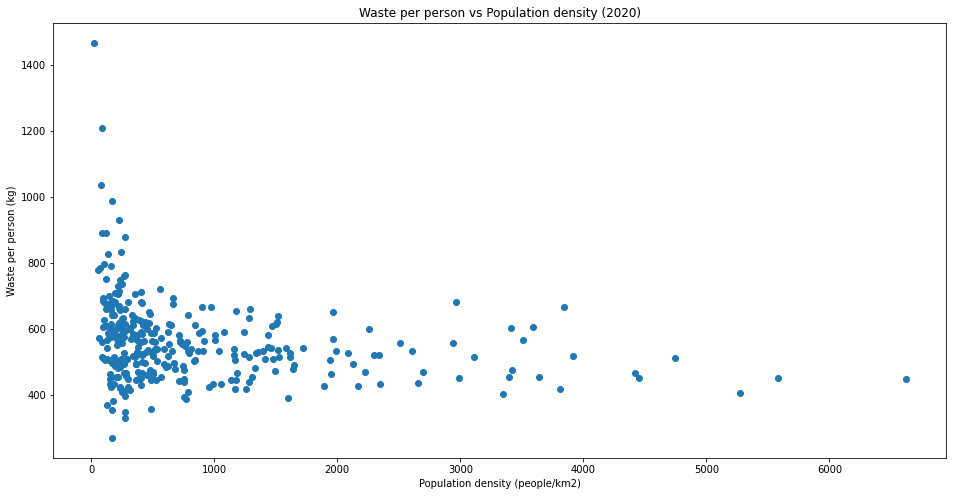

In [131]:
# Create a scatter plot for waste per person vs population density
fig, ax = plt.subplots(figsize = (16,8))

x = waste_permun_2020['population_density']
y = waste_permun_2020['waste_per_person_groupedtotal']

plt.scatter(x,y)
ax.set_xlabel('Population density (people/km2)')
ax.set_ylabel('Waste per person (kg)')
plt.title('Waste per person vs Population density (2020)')

plt.show()

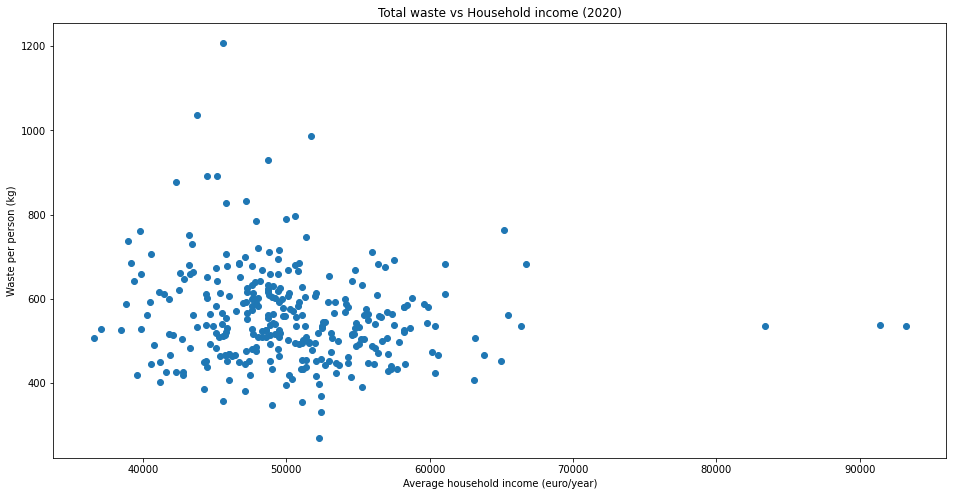

In [132]:
# Create a scatter plot for waste per person vs household income
fig, ax = plt.subplots(figsize = (16,8))

x = waste_permun_2020['avg_household_income']*1000
y = waste_permun_2020['waste_per_person_groupedtotal']

plt.scatter(x,y)
ax.set_xlabel('Average household income (euro/year)')
ax.set_ylabel('Waste per person (kg)')
plt.title('Total waste vs Household income (2020)')

plt.show()

The impression one may get is that for some of the outliers (with a very high waste per person) they all are in the 'low population density' range.

Let us also take a look directly in the data to the data points:
* with a high waste per person (outside the 'main cloud of points')
* with a high average household income (outside the 'main cloud of points')

In [133]:
# Show the entries with a waste per person over 800
waste_permun_2020[waste_permun_2020['waste_per_person_groupedtotal']>800]

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal,population,population_density,avg_household_size,avg_household_income,total_waste
139,139,A025448,GM0059,2020,877.3,Total household waste,Achtkarspelen,877.4,27843.0,272.0,2.35,42.3,24429448.2
1879,1879,A025448,GM0109,2020,890.5,Total household waste,Coevorden,890.5,35297.0,119.0,2.23,45.2,31431978.5
4559,4559,A025448,GM0677,2020,826.6,Total household waste,Hulst,826.5,27556.0,137.0,2.13,45.8,22775034.0
6779,6779,A025448,GM1695,2020,891.4,Total household waste,Noord-Beveland,891.3,7392.0,86.0,2.03,44.5,6588489.6
7719,7719,A025448,GM0703,2020,930.4,Total household waste,Reimerswaal,930.3,22730.0,223.0,2.49,48.7,21145719.0
8319,8319,A025448,GM0088,2020,1467.2,Total household waste,Schiermonnikoog,1467.3,947.0,23.0,1.76,NaN,1389533.1
8619,8619,A025448,GM1714,2020,1036.9,Total household waste,Sluis,1036.9,23210.0,83.0,2.04,43.8,24066449.0
9079,9079,A025448,GM0448,2020,0.0,Total household waste,Texel,1207.7,13575.0,84.0,2.07,45.6,16394527.5
9539,9539,A025448,GM0717,2020,987.0,Total household waste,Veere,987.1,21880.0,165.0,2.28,51.7,21597748.0
10679,10679,A025448,GM0873,2020,832.7,Total household waste,Woensdrecht,832.6,21876.0,239.0,2.24,47.2,18213957.6


In [134]:
# Show the entries with an average household income above 65000
waste_permun_2020[waste_permun_2020['avg_household_income']>65]

,ID,waste_type,municipality,period,waste_per_person_total,waste_name,municipality_name,waste_per_person_groupedtotal,population,population_density,avg_household_size,avg_household_income,total_waste
1319,1319,A025448,GM0376,2020,534.8,Total household waste,Blaricum,534.9,11540.0,1038.0,2.32,93.2,6172746.0
1359,1359,A025448,GM0377,2020,538.4,Total household waste,Bloemendaal,538.4,23571.0,592.0,2.34,91.4,12690626.4
3239,3239,A025448,GM1942,2020,534.8,Total household waste,Gooise Meren,534.7,58055.0,1396.0,2.21,66.4,31042008.5
3879,3879,A025448,GM0397,2020,681.8,Total household waste,Heemstede,681.8,27234.0,2968.0,2.21,66.7,18568141.2
5019,5019,A025448,GM0417,2020,534.8,Total household waste,Laren (NH.),534.8,11280.0,909.0,2.17,83.4,6032544.0
9999,9999,A025448,GM0866,2020,566.6,Total household waste,Waalre,561.3,17456.0,780.0,2.29,65.5,9798052.8
10459,10459,A025448,GM0614,2020,764.2,Total household waste,Westvoorne,764.1,14731.0,277.0,2.19,65.2,11255957.1


No major new insights in comparison to what we observed and concluded above. We see interesting correlations, however should be careful to draw some conclusions.

## 3.6 Correlation with pricing system

If there is one factor for which we would hope to find a correlation with household waste, it would be the pricing system. As mentioned earlier on, "Diftar" is a (Dutch) term used for "differentiated tariffs" for household waste collection. (More informationn about it can also found e.g. [here](https://www.afvalcirculair.nl/onderwerpen/monitoring-cijfers/afvalcijfers/afvalcijfers/afvalstoffenheffing-2020/).

The data that we have is the pricing system for all Dutch municipalities for 2018. Let us analyze whether we see a correlation between the pricing system and the amount of waste per person.

In [135]:
# Show a sample of what we imported earlier
diftar2018.head(5)

,municipality_name,pricing_system_nl,pricing_system
0,Aa en Hunze,Aantal personen,Number of persons
1,Aalsmeer,Volume,Volume
2,Aalten,Dure afvalzak,Expensive waste bag
3,Achtkarspelen,Aantal personen,Number of persons
4,Alblasserdam,Aantal personen,Number of persons


In [136]:
# Get the waste information per municipality for 2018
waste_permun_2018 = waste_totals_per_municipality_enriched[waste_totals_per_municipality_enriched['period']==2018]

# For readability, take a subset of columns
waste_permun_2018_relcol =waste_permun_2018[['municipality_name','waste_per_person_groupedtotal', 'population', 'population_density', 'avg_household_size', 'avg_household_income']]

# Remove rows for which we don't have waste data
waste_permun_2018_relcol = waste_permun_2018_relcol[waste_permun_2018_relcol['waste_per_person_groupedtotal']>0.0]

# Show a sample
waste_permun_2018_relcol.head(5)

,municipality_name,waste_per_person_groupedtotal,population,population_density,avg_household_size,avg_household_income
17,Aa en Hunze,653.6,25390.0,92.0,2.24,45.6
37,Aalburg,464.4,13153.0,261.0,2.61,49.1
57,Aalsmeer,485.4,31499.0,1566.0,2.40,52.8
77,Aalten,403.5,26962.0,279.0,2.34,42.6
137,Achtkarspelen,756.4,27935.0,273.0,2.37,38.7


In [137]:
# Merge in the diftar data (pricing system)
waste_permun_2018_relcol_withsystem = waste_permun_2018_relcol.merge(diftar2018, how = 'left')

# Remove rows where system is unknown (and get a simpler dataframe name)
w2018 = waste_permun_2018_relcol_withsystem[waste_permun_2018_relcol_withsystem['pricing_system'].notna()].copy()

# Show a sample (to check)
w2018.head(5)

,municipality_name,waste_per_person_groupedtotal,population,population_density,avg_household_size,avg_household_income,pricing_system_nl,pricing_system
0,Aa en Hunze,653.6,25390.0,92.0,2.24,45.6,Aantal personen,Number of persons
2,Aalsmeer,485.4,31499.0,1566.0,2.40,52.8,Volume,Volume
3,Aalten,403.5,26962.0,279.0,2.34,42.6,Dure afvalzak,Expensive waste bag
4,Achtkarspelen,756.4,27935.0,273.0,2.37,38.7,Aantal personen,Number of persons
5,Alblasserdam,497.5,20014.0,2280.0,2.44,44.6,Aantal personen,Number of persons


Let's take a look again at the different entries that we have.

In [138]:
w2018['pricing_system'].value_counts()

Number of persons                         153
Volume and frequency                       70
Expensive waste bag                        23
Fixed rate                                 21
Volume, frequency and number of people     20
Volume                                     15
Expensive waste bag & number of people      8
Weight & Frequency                          5
Weight                                      5
Various systems in the municipality         2
Weight and number of people                 1
Name: pricing_system, dtype: int64

A lot of different systems. It appears that we can basically simplify this into 3 categories though:
* Fixed rate
* Rate depending solely on the number of persons
* Rate depending on volume, one way or the other

Actually it's the latter category that we are interested it compared to everything else mostly, however it may be interesting to see as well if there is a difference between fixed rate and rate depending on the number of persons.

Then let us create a box plot to see the difference.

In [139]:
# Introduce 3 category types
w2018['system_category'] = 'volume dependent'
w2018.loc[w2018['pricing_system']=='Number of persons','system_category']= 'number of persons'
w2018.loc[w2018['pricing_system']=='Fixed rate','system_category']= 'flat rate'

In [140]:
# Show a sample to check
w2018.head(5)

,municipality_name,waste_per_person_groupedtotal,population,population_density,avg_household_size,avg_household_income,pricing_system_nl,pricing_system,system_category
0,Aa en Hunze,653.6,25390.0,92.0,2.24,45.6,Aantal personen,Number of persons,number of persons
2,Aalsmeer,485.4,31499.0,1566.0,2.40,52.8,Volume,Volume,volume dependent
3,Aalten,403.5,26962.0,279.0,2.34,42.6,Dure afvalzak,Expensive waste bag,volume dependent
4,Achtkarspelen,756.4,27935.0,273.0,2.37,38.7,Aantal personen,Number of persons,number of persons
5,Alblasserdam,497.5,20014.0,2280.0,2.44,44.6,Aantal personen,Number of persons,number of persons


In [141]:
# Show value counts to check
w2018['system_category'].value_counts()

number of persons    153
volume dependent     149
flat rate             21
Name: system_category, dtype: int64

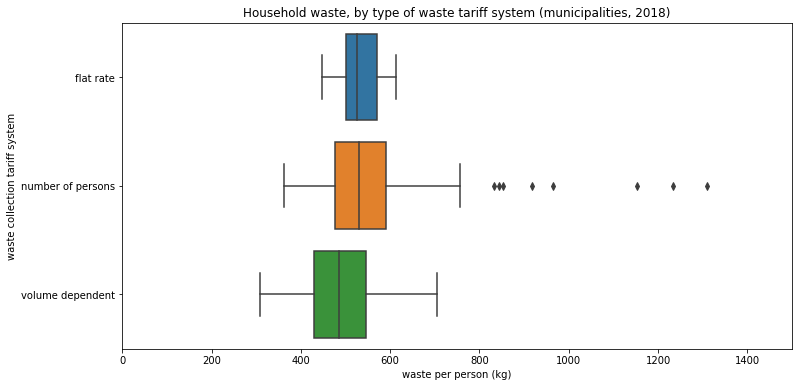

In [142]:
# Create a box plot per system

fig, ax = plt.subplots(figsize = (12,6))

boxorder = ['flat rate', 'number of persons', 'volume dependent']
sns.boxplot(x = w2018['waste_per_person_groupedtotal'], y = w2018['system_category'], order = boxorder).set(xlabel = 'waste per person (kg)', ylabel = 'waste collection tariff system')
ax.set_xlim(0,1500)
plt.title('Household waste, by type of waste tariff system (municipalities, 2018)')
plt.show()

Observation:
* While we don't see a difference between a flat rate and a rate that depends on the number of persons, it seems that in municipalities where the tariff one way or the other depends on the waste volume, there is less waste per person

That looks positive as such. We must be very careful with drawing any conclusions. First, we did not test whether the observed difference is statistically significant. (My gut feeling given the numbers says it does, but e.g. a chi-squared test could be useful.)

Even more though, as we have seen already there are many factors that appear to have impact on the amount of waste, and it is very hard to single out this particular factor.

What would possibly a better test still is to look at municipalities that *changed* their tariff system at some point, and then look at what happened to the amount of waste. This would require data though that we currently don't have.

For now, let's say that we have an indication that a differentiated tariff system appears to have a positive impact.

# 4. Summary and conclusions

In this study, we have (after significant cleaning) analyzed data about Dutch household waste for the period 2001 - 2020. Also referring back to the goals and expectations in the introduction, let's summarize the main findings.

* Total household waste per person peaked in the first years of the century, then gradually declined, however was on the rise again in 2020.

* Residual waste is the biggest fraction, but has decreased during this period.

* There are large differences between different municipalities. Both in terms of total waste, and also when looking at a breakdown in types of waste.

* One observation (but explicitly not implying a cause) is that large, densily populated municipalities (cities) have less waste per person than less densily populated municipalities. However, the high amounts of organic waste in 'greener' areas could be an explanation of that.

* There is an indication that a pricing system that depends on the amount of waste has a positive impact.

The data allows for further analysis, there is much more to explore. In particular for more firm conclusions about influential factors for what waste is collected, more study would be required. It may also require different data sources.